### 국내 과일 시장과 소비 분석 및 수요예측 <br>
1. 과일 1일 섭취량 분석
   1-1. 연령층 별 과일섭취량 추이와 섭취량 순위 <br>
   1-2. 소득 수준별 과일섭취량 추이와 섭취량 순위 <br>
   1-3. 성별 과일 섭취량 비교 <br> <br>

2. 과일 가격변화와 과일 섭취량의 상관 관계 분석 <br>
   2-1. 과일별 가격 변동 추이 <br>
   2-2. 과일 가격과 식품 물가 상관 관계 분석 <br> <br>

3. 과일별 판매량 분석 <br>
   3-1 홈플러스 크롤링 <br>
   3-2 품목별 판매량 시각화 <br> <br>

4. 과일별 소비량 분석  <br>
   4-1 소비량 시각화<br> <br>

5. 과일 재배지 분포 시각화 <br>
   5-1. 과일 재배지 시각화 <br> <br>

6. 과일 특성에 따른 선호도 분류 <br>
   6-1. 산도, 당도, 횡경, 종경으로 분류하는 모델 만들기 <br>
   6-2. 판매량으로 특징의 과일 선호도가 높은지 분석 <br>  <br>
   
7. 블로그 데이터 클라우드로 보는 과일 트렌드 분석 <br>
   7-1. 네이버 블로그 API로 자료 수집 <br>
   7-2. 데이터 클라우드 생성 <br>
   7-3. 최근 일주일간의 관심도 변화

# 1. 과일 1일 섭취량 분석

## ※ 패키지 설치 및 로드

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## ※ 데이터 준비
[ 과일 1일 섭취량 데이터 설명 ] <br>
자료명 : 2021 국민건강통계 <br>
파일명 : 식품섭취.xlsx <br>
시트명 : 11.과일류 <br>
과일 섭취량 : 과일류 식품의 섭취 중량에 대한 합/분석대상자 수 <br>
소득수준 : 월가구균등화소득(월가구소득/√가구원수)을 성별·연령별(5세단위) 오분위로 분류

## 1-1. 연령층 별 과일섭취량 추이와 섭취량 순위

In [571]:
# 파일 경로와 시트명 설정
file_path = '식품섭취.xlsx' # 파일경로
sheet_name = '11.과일류' # 시트명

# Excel 파일 읽기 : 연령별 데이터
age_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=15,
                   nrows=8)

# 데이터프레임 확인
age_df

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,1459,176.9,(9.0),1506,187.1,(8.0),1199,91.8,...,(8.1),736,139.2,(9.6),535,122.3,(9.3),483,129.4,(8.8)
10-18,NaN,NaN,1440,196.9,(10.3),1370,187.5,(9.9),1205,83.9,...,(8.8),639,96.1,(7.5),469,94.8,(16.1),484,102.1,(10.5)
19-29,NaN,NaN,1550,220.0,(11.3),1370,203.7,(11.6),1045,90.3,...,(7.0),669,86.8,(8.2),624,66.7,(7.1),584,64.3,(5.8)
30-39,NaN,NaN,1866,228.8,(9.8),1805,227.0,(10.4),1466,110.8,...,(11.5),855,110.1,(8.3),633,104.4,(8.5),549,83.1,(8.0)
40-49,NaN,NaN,1461,202.9,(8.5),1601,222.4,(12.4),1559,88.7,...,(7.4),1036,165.2,(18.1),807,143.3,(9.4),810,128.1,(9.1)
50-59,NaN,NaN,1104,189.7,(11.2),979,235.4,(12.6),1015,83.7,...,(9.9),1061,201.6,(10.3),861,169.6,(11.4),909,180.2,(10.1)
60-69,NaN,NaN,942,158.6,(11.6),788,210.2,(14.1),847,63.3,...,(10.6),1043,188.6,(9.2),892,177.5,(10.3),981,177.3,(10.4)
70+,NaN,NaN,578,115.1,(11.7),549,150.1,(11.5),594,41.4,...,(10.6),1108,147.6,(7.9),987,156.7,(8.4),1140,142.1,(8.9)


In [572]:
# 2017~2021(5년) 연령별 섭취 데이터만 수집
df=age_df.drop([0,1], axis=1)
df = df.iloc[:,39::3]
df

,42,45,48,51,54
2,,,,,
1-9,812,756,736,535,483
10-18,634,605,639,469,484
19-29,653,682,669,624,584
30-39,845,862,855,633,549
40-49,1028,1050,1036,807,810
50-59,1116,1055,1061,861,909
60-69,1036,997,1043,892,981
70+,1043,1057,1108,987,1140


In [573]:
df.columns=['2017','2018','2019','2020','2021'] # 컬럼명 변경
df.index=['10대 미만','10대','20대','30대','40대','50대','60대','70대 이상'] # 인덱스명 변경
df

,2017,2018,2019,2020,2021
10대 미만,812,756,736,535,483
10대,634,605,639,469,484
20대,653,682,669,624,584
30대,845,862,855,633,549
40대,1028,1050,1036,807,810
50대,1116,1055,1061,861,909
60대,1036,997,1043,892,981
70대 이상,1043,1057,1108,987,1140


### [ 5년 간 연령별 과일 섭취량 추이 ]

[Text(0.5, 0, '년도'),
 Text(0, 0.5, '섭취량'),
 Text(0.5, 1.0, '연도에 따른 연령별 과일섭취량 추이')]

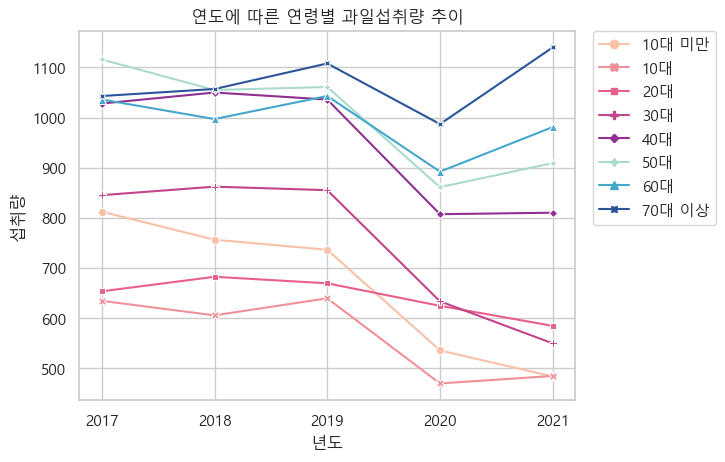

In [574]:
df_copy = df.T # x축 y축 치환
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#aadacc', '#44a7cb', '#2a5599' ] # 색상 리스트

# 그래프 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=1, palette=colors)
ax = sns.lineplot(data=df_copy, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량',title='연도에 따른 연령별 과일섭취량 추이')

결과: <b>2020년도에 전 연령대에서 과일 섭취량이 대폭 하락세</b>를 보였고, <br>
<b>40대 이상의 연령층</b>에서는 <b>2021년 과일 섭취량이 다시 증가</b>하기 시작했지만, 
<b>30대 이하의 연령층</b>에서는 <b>소폭 상승하거나 꾸준히 하락세</b>를 보이고 있다.

### [ 과일 섭취량이 많은 연령대 순위 ]

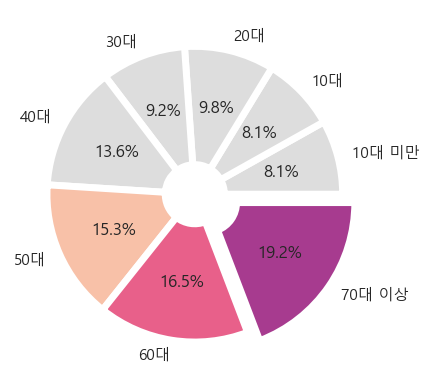

In [575]:
explode = [0, 0, 0, 0, 0, 0, 0, 0.10]
colors = ['#ddd', '#ddd', '#ddd', '#ddd', '#ddd', '#f8c1a8', '#e8608a', '#a73b8f']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_copy.loc['2021'], labels=df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 70대 이상이 19.2%로 1위, 60대가 16.5%로 2위, 50대가 15.3%로 3위</b> <br>
대체로 연령대가 높을수록 과일 섭취량이 많은 것으로 나타났다.

### [ 과일 섭취량이 적은 연령대 순위 ]

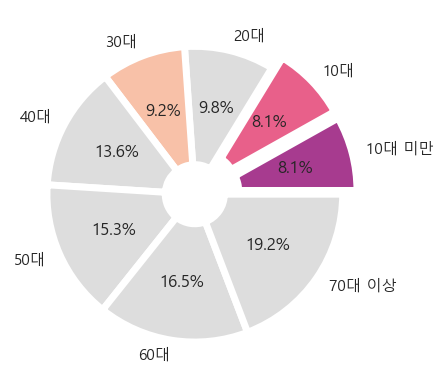

In [576]:
explode = [0.10, 0.10, 0, 0, 0, 0, 0, 0,]
colors = ['#a73b8f', '#e8608a', '#ddd','#f8c1a8', '#ddd', '#ddd', '#ddd', '#ddd']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_copy.loc['2021'], labels=df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 19대 미만이 8.1%로 1위, 10대가 8.1%로 2위, 30대가 9.2%로 3위</b>

## 1-2. 소득 수준별 과일섭취량 추이와 섭취량 순위

In [577]:
# Excel 파일 읽기 : 소득수준별 데이터
income_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=49,
                   nrows=5)

# 데이터프레임 확인
income_df

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
하,NaN,NaN,2037,145.9,(8.6),1689,174.6,(9.7),1870,59.4,...,(6.3),1422,112.6,(6.3),1165,98.6,(9.1),1182,104.5,(8.4)
중하,NaN,NaN,2009,179.1,(7.7),1896,196.5,(10.4),1790,77.8,...,(5.8),1403,127.0,(6.9),1161,116.2,(7.9),1200,97.0,(5.9)
중,NaN,NaN,2172,197.5,(8.3),1898,220.3,(11.5),1732,91.2,...,(7.7),1454,123.2,(6.7),1166,127.6,(9.5),1206,120.3,(6.8)
중상,NaN,NaN,2114,212.6,(10.1),1778,213.6,(11.3),1736,98.2,...,(8.1),1436,152.7,(14.8),1116,124.9,(8.7),1161,119.8,(8.8)
상,NaN,NaN,2068,236.5,(10.4),2130,234.1,(10.7),1715,116.7,...,(7.4),1405,160.1,(8.8),1182,135.8,(10.0),1163,138.7,(7.8)


In [578]:
# 2017~2021(5년) 소득수준별 섭취 데이터만 수집
df2=income_df.drop([0,1], axis=1)
df2 = df2.iloc[:,39::3]
df2

,42,45,48,51,54
2,,,,,
하,1435,1411,1422,1165,1182
중하,1453,1415,1403,1161,1200
중,1437,1401,1454,1166,1206
중상,1453,1413,1436,1116,1161
상,1375,1411,1405,1182,1163


In [579]:
df2.index = ['하','중하','중','중상','상'] # 인덱스명 변경(공백제거)
df2.columns=['2017','2018','2019','2020','2021'] # 컬럼명 변경
df2

,2017,2018,2019,2020,2021
하,1435,1411,1422,1165,1182
중하,1453,1415,1403,1161,1200
중,1437,1401,1454,1166,1206
중상,1453,1413,1436,1116,1161
상,1375,1411,1405,1182,1163


### [ 5년 간 소득수준별 과일 섭취량 추이 ]

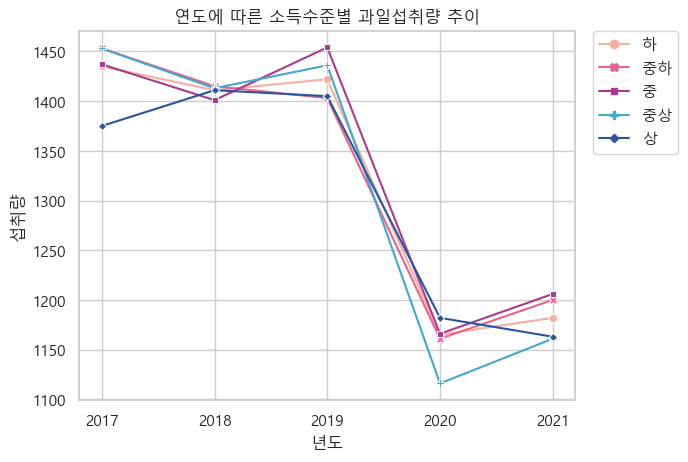

In [580]:
df2_copy = df2.T # x축 y축 치환
colors = [ '#f4aea3', '#e8638b', '#a73b8f','#44a7cb','#2a5599']  # 색상 리스트

# 그래프 그리기
sns.set(style='whitegrid', font='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df2_copy, markers=True, dashes=False, palette=colors)  # 컬러 지정
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량', title='연도에 따른 소득수준별 과일섭취량 추이')
plt.show()

결과: <b>2020년도에 전 소득계층에서 과일 섭취량이 대폭 하락세</b>를 보였고, <b>2020년도에 소폭 상승세</b>를 보였다.

### [ 과일 섭취량이 많은 소득계층 순위 ]

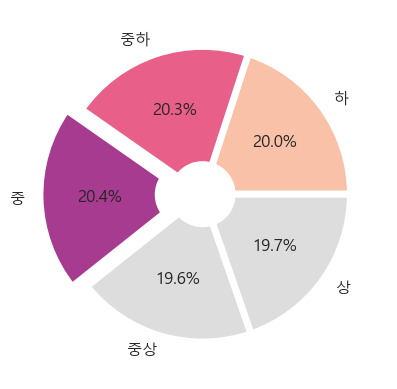

In [581]:
explode = [0, 0, 0.10, 0, 0]
colors = ['#f8c1a8', '#e8608a', '#a73b8f', '#ddd', '#ddd']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df2_copy.loc['2021'], labels=df2_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 중위계층이 20.4%로 1위, 중하위계층이 20.3%로 2위, 하위계층이 20.0%로 3위</b>

## 1-3. 성별 과일 섭취량 비교

In [582]:
# Excel 파일 읽기 : 남성 데이터
male_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=62,
                   nrows=8)

# 데이터프레임 확인
male_df.head()

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,766,166.2,(10.6),811,199.3,(9.5),615,90.3,...,(10.2),373,145.0,(11.6),273,133.6,(11.2),240,132.5,(13.0)
10-18,NaN,NaN,738,199.0,(13.7),696,180.1,(11.4),634,76.8,...,(11.6),334,84.4,(9.9),255,100.1,(26.7)*,259,98.2,(13.4)
19-29,NaN,NaN,707,188.3,(13.5),615,155.2,(12.2),451,73.2,...,(11.0),323,92.1,(13.6),292,63.1,(9.0),279,60.7,(8.9)
30-39,NaN,NaN,922,197.0,(12.1),857,182.4,(11.8),659,99.0,...,(11.9),384,91.5,(11.6),270,93.7,(12.5),232,71.8,(10.7)
40-49,NaN,NaN,720,161.6,(10.6),784,167.9,(15.1),731,73.3,...,(10.6),441,139.6,(10.0),348,123.6,(10.7),351,124.2,(15.0)


In [583]:
# Excel 파일 읽기 : 여성 데이터
female_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=109,
                   nrows=8)

# 데이터프레임 확인
female_df.head()

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,693,188.9,(12.7),695,172.9,(10.0),584,93.5,...,(10.0),363,133.2,(11.1),262,110.5,(12.7),243,126.1,(11.2)
10-18,NaN,NaN,702,194.7,(12.5),674,195.2,(13.3),571,92.0,...,(12.5),305,109.0,(10.3),214,88.5,(10.2),225,106.4,(14.6)
19-29,NaN,NaN,843,246.6,(13.8),755,243.7,(15.4),594,108.3,...,(7.6),346,80.8,(7.7),332,70.6,(9.7),305,68.2,(7.9)
30-39,NaN,NaN,944,260.2,(12.5),948,266.7,(13.0),807,123.3,...,(16.8),471,130.4,(9.4),363,116.2,(10.8),317,95.5,(10.1)
40-49,NaN,NaN,741,245.8,(11.7),817,273.0,(14.8),828,104.7,...,(9.1),595,191.9,(34.6),459,163.8,(13.4),459,132.2,(9.8)


In [584]:
# 2012~2021 남성 섭취 데이터만 수집
male_data=male_df.drop([0,1], axis=1)
male_data=male_data.iloc[:,24::3]

# 2021 남성 섭취 데이터만 수집
male_data = male_data.iloc[:,9]
male_data

2
 1-9      240
 10-18    259
 19-29    279
 30-39    232
 40-49    351
 50-59    370
 60-69    414
 70+      494
Name: 54, dtype: int64

In [585]:
# 2012~2021 여성 섭취 데이터만 수집
female_data=female_df.drop([0,1], axis=1)
female_data=female_data.iloc[:,24::3]

# 2021 여성 섭취 데이터만 수집
female_data = female_data.iloc[:,9]
female_data

2
 1-9      243
 10-18    225
 19-29    305
 30-39    317
 40-49    459
 50-59    539
 60-69    567
 70+      646
Name: 54, dtype: int64

In [586]:
total = {'여성':female_data, '남성':male_data}
total_data = pd.DataFrame(total)
total_data

,여성,남성
2,,
1-9,243,240
10-18,225,259
19-29,305,279
30-39,317,232
40-49,459,351
50-59,539,370
60-69,567,414
70+,646,494


In [587]:
total_data.index=['10대 미만','10대','20대','30대','40대','50대','60대','70대 이상'] # 인덱스명 변경

In [588]:
total_data_copy = total_data.T # x축 y축 치환

### [ 성별 과일 섭취량 비교 ]

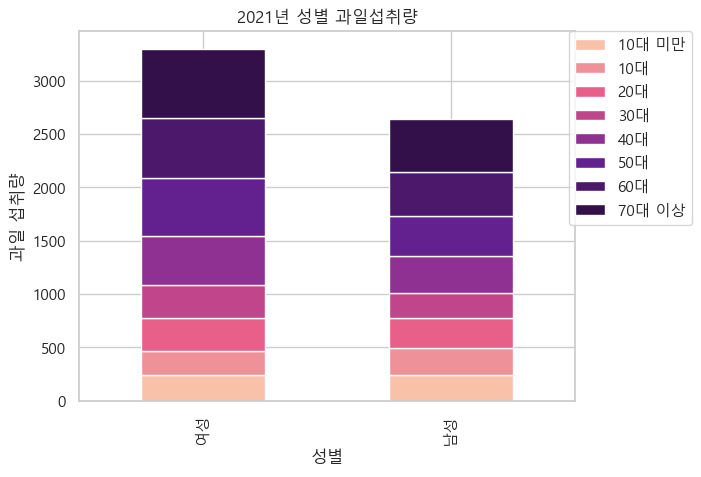

In [589]:
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#63218f', '#4b186c', '#33104a' ]
total_data_copy.plot(kind='bar', stacked=True, color=colors)
plt.title('2021년 성별 과일섭취량')
plt.xlabel('성별')
plt.ylabel('과일 섭취량')

# 범례 위치와 레이아웃 조정
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()

<b>결과: 여성의 과일 섭취량이 남성의 과일 섭취량 보다 많은것으로 나타났으며, 연령대가 높아질 수록 그 폭이 상승했다.</b>

# 2. 과일 가격변화와 과일 섭취량의 상관 관계 분석

## ※ 데이터 준비
[ 과일 가격 정보 ] <br>
자료명 : 연도별 도.소매가격정보 OPEN-API  <br> 

[ 물가상승률 ]
자료명 : 소비자물가총지수와 주요 품목별 소비자물가상승률 <br>
파일명 : 물가상승률.xlsx <br>
단위 : 2020=100, %
소비자물가상승률 = {(당해년도 연간소비자물가지수 ÷ 직전 연간소비자물가지수) - 1} × 100.

## ※ 패키지 설치 및 로드

In [11]:
import requests
import xml.etree.ElementTree as ET
import pprint
import numpy as np

## 2-1. 과일별 가격 변동 추이

In [622]:
# 부류코드
code_categories = [400]  # 200:채소류, 400: 과일류

# 품종별 등급코드
code_product = {
    221: ['00'],
    226: ['00'],
    411: ['01', '05', '06', '07'],
    412: ['01', '02', '03', '04'],
    413: ['01', '04', '05'],
    414: ['01', '02', '03', '06', '07', '08', '09', '10', '11', '12'],
    415: ['00', '01', '02']
}
# 221: 수박, 226: 딸기, 411: 사과, 412: 배, 413: 복숭아, 414: 포도, 415: 감귤

# API 요청 보내기
base_url = 'http://www.kamis.or.kr/service/price/xml.do?action=yearlySalesList'
p_cert_key = 'a667632f-857f-40c5-805c-6ee126d7a1f4'
p_cert_id = 3772
p_yyyy = 2021
p_countycode = 1101
p_convert_kg_yn = 'N'

dfset = pd.DataFrame()  # 빈 데이터프레임

for code_category in code_categories:
    for item_code, kind_codes in code_product.items():
        for kind_code in kind_codes: # 품종별 등급코드 순회
            for rank_code in range(1, 6): # 품종 순회
                try:
                    # 요청
                    response = requests.get(
                        f'{base_url}&p_yyyy={p_yyyy}&p_itemcategorycode={code_category}&p_itemcode={item_code}&p_kindcode={kind_code}&p_graderank={rank_code}&p_countycode={p_countycode}&p_convert_kg_yn={p_convert_kg_yn}&p_cert_key={p_cert_key}&p_cert_id={p_cert_id}&p_returntype=xml'
                    )
                    # 응답 처리
                    if response.status_code == 200:                
                        # XML 파싱
                        root = ET.fromstring(response.content)

                        # 데이터 추출
                        data_list = []
                        for price_elem in root.findall('price'):
                            try:
                                productclscode = price_elem.find('productclscode').text
                            except AttributeError:
                                continue  # productclscode가 없는 경우 스킵

                            caption = price_elem.find('caption').text
                            for item_elem in price_elem.findall('item'):
                                temp_dict = {'caption': caption}
                                for child in item_elem:
                                    temp_dict[child.tag] = child.text
                                data_list.append(temp_dict)

                        # 판다스 데이터프레임으로 변환
                        df = pd.DataFrame(data_list)
                        if dfset.empty:
                            print(df)
                            # 첫 데이터
                            dfset = df 
                        else:
                            # 첫 데이터 이후부터는 이어붙임
                            if df.empty:
                                continue  # 빈 데이터일때 스킵            
                            print(df)                
                            dfset = pd.concat([dfset, df], axis=0, join='outer', ignore_index=True)
                    else:
                        print('Error occurred:', response.status_code)

                except requests.exceptions.RequestException as e:
                    print('Request failed:', e)
                except Exception as e:
                    print('An error occurred:', e)

                                caption   div avg_data max_data min_data  \
0   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2016   16,230   23,000   11,000   
1   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2017   15,235   25,000    9,000   
2   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2018   18,715   33,000    9,000   
3   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2019   18,626   28,000   12,000   
4   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2020   16,511   28,300    6,300   
5   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2021   16,069   25,000    7,000   
6   중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개    평년   17,122   33,000    6,300   
7        소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2016   19,720   28,250   13,717   
8        소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2017   18,941   30,375   12,775   
9        소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2018   21,322   30,833   12,925   
10       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2019   21,704   31,050   15,850   
11       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2020   21,077   29,450   14,933   
12       소매가

                                        caption   div avg_data max_data  \
0   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2016   30,448   34,000   
1   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2017   33,278   35,000   
2   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2018   43,333   50,000   
3   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2019   30,667   37,000   
4   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2020   54,353   61,600   
5   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2021   31,541   33,000   
6   중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg    평년   35,759   61,600   
7         소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2016   12,057   12,750   
8         소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2017   13,773   15,150   
9         소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2018   15,000   15,000   
10        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2019   17,312   20,000   
11        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2020   18,737   20,000   
12        소매가격 > 과일류 > 사과

                                 caption div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 배 > 만삼길 > 상품 > 15kg  평년        -        -        -   
1        소매가격 > 과일류 > 배 > 만삼길 > 상품 > 10개  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
1           -       -       -  
                                 caption div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 배 > 만삼길 > 중품 > 15kg  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
                                 caption div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 배 > 장십랑 > 상품 > 15kg  평년        -        -        -   
1        소매가격 > 과일류 > 배 > 장십랑 > 상품 > 10개  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
1           -       -       -  
                                 caption div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 배 > 장십랑 > 중품 > 15kg  평년        -        -    

                                   caption   div avg_data max_data min_data  \
0   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg  2016   20,528   28,000   14,000   
1   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg  2017   23,716   30,000   20,000   
2   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg  2018   27,870   32,000   22,000   
3   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg  2019   20,763   28,000   15,000   
4   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg  2020   23,035   33,600   15,600   
5   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg  2021   21,805   37,000   17,200   
6   중도매인 판매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 5kg    평년   22,505   33,600   14,000   
7        소매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 1kg  2016    5,236    8,000    4,222   
8        소매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 1kg  2017    5,348    6,277    4,490   
9        소매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 1kg  2018    6,949    8,760    6,165   
10       소매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 1kg  2019    5,325    7,000    4,720   
11       소매가격 > 과일류 > 포도 > 캠벨얼리 > L과 > 1kg  2020    

                                caption   div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 포도 > 수입 > L과 > 8kg  2016   30,403   38,000   26,000   
1  중도매인 판매가격 > 과일류 > 포도 > 수입 > L과 > 8kg  2017   32,104   40,000   23,000   
2  중도매인 판매가격 > 과일류 > 포도 > 수입 > L과 > 8kg  2018   34,140   37,000   32,000   
3  중도매인 판매가격 > 과일류 > 포도 > 수입 > L과 > 8kg    평년        -   40,000   23,000   

  stddev_data cv_data af_data  
0       4,209   13.84    0.46  
1       4,008   12.48    0.74  
2       1,457    4.27    0.16  
3       1,871       -    0.74  
                                caption   div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 포도 > 수입 > M과 > 8kg  2016   27,746   35,000   24,000   
1  중도매인 판매가격 > 과일류 > 포도 > 수입 > M과 > 8kg  2017   29,007   37,000   20,000   
2  중도매인 판매가격 > 과일류 > 포도 > 수입 > M과 > 8kg  2018   30,314   34,000   28,000   
3  중도매인 판매가격 > 과일류 > 포도 > 수입 > M과 > 8kg    평년        -   37,000   20,000   
4       소매가격 > 과일류 > 포도 > 수입 > M과 > 1kg  2016    6,587    7,313    5,396   
5  

                                 caption   div avg_data max_data min_data  \
0  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10kg  2016   20,541   29,000   15,000   
1  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10kg  2017   26,463   60,000   16,000   
2  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10kg  2018   24,500   26,000   23,000   
3  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10kg    평년        -   60,000   15,000   
4        소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개  2016    2,924    4,390    2,041   
5        소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개  2017    3,728    7,410    2,573   
6        소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개  2018    3,129    3,207    2,995   
7        소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개    평년        -    7,410    2,041   

  stddev_data cv_data af_data  
0       4,209   20.49    0.93  
1      11,739   44.36    2.75  
2       1,732    7.07    0.13  
3       3,017       -    3.00  
4         573   19.60    1.15  
5       1,454   39.00    1.88  
6         101    3.23    0.07  
7         418       -    2.63  
                  

In [623]:
dfset.shape

(455, 8)

In [624]:
# 처음 5개 데이터
dfset.head()

,caption,div,avg_data,max_data,min_data,stddev_data,cv_data,af_data
0,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2016,"16,230","23,000","11,000","2,447",15.08,1.09
1,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,"15,235","25,000","9,000","3,666",24.06,1.78
2,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,"18,715","33,000","9,000","4,834",25.83,2.67
3,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,"18,626","28,000","12,000","2,638",14.16,1.33
4,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,"16,511","28,300","6,300","5,620",34.04,3.49


In [625]:
# 도매가 제거
mask1= dfset['caption'].str.contains('소매가격')
filter_df = dfset.loc[mask1, :]

In [626]:
# 불필요한 데이터 제거
filter_df = filter_df.drop(['stddev_data','cv_data','af_data'], axis=1)

In [627]:
# 컬럼확인
print(filter_df.columns)

Index(['caption', 'div', 'avg_data', 'max_data', 'min_data'], dtype='object')


In [628]:
# 컬렴명 변경
filter_df = filter_df.rename(columns={'caption':'과일이름', 'div':'연도','avg_data':'평균가격', 'max_data':'최대가격', 'min_data':'최소가격'})

In [629]:
# 변경된 데이터 타입 확인
print(filter_df.dtypes)

과일이름    object
연도      object
평균가격    object
최대가격    object
최소가격    object
dtype: object


In [630]:
# 년도 데이터의 고유값 확인
filter_df['연도'].unique()

array(['2016', '2017', '2018', '2019', '2020', '2021', '평년'], dtype=object)

In [631]:
# 평년 데이터 삭제
filter_df = filter_df[filter_df['연도'] != '평년']

# 년도 데이터의 고유값 확인
filter_df['연도'].unique()

array(['2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)

In [632]:
# 데이터 타입 확인
print(filter_df.dtypes)

과일이름    object
연도      object
평균가격    object
최대가격    object
최소가격    object
dtype: object


In [633]:
# 데이터 타입 변경을 위해 숫자가 아닌 데이터 삭제
filter_df.loc[:, '평균가격':'최소가격'] = filter_df.loc[:, '평균가격':'최소가격'].apply(lambda x: x.str.replace(',', ''))
filter_df.head()

,과일이름,연도,평균가격,최대가격,최소가격
7,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2016,19720,28250,13717
8,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,18941,30375,12775
9,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,21322,30833,12925
10,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,21704,31050,15850
11,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,21077,29450,14933


In [634]:
# 데이터 타입 변경
filter_df_copy = filter_df.astype({'과일이름':'string', '연도':'int', '평균가격':'int', '최대가격':'int', '최소가격':'int'})

#데이터 타입 확인
print(filter_df_copy.dtypes)

과일이름    string
연도       int32
평균가격     int32
최대가격     int32
최소가격     int32
dtype: object


In [636]:
# 과일이름으로 그룹화
filter_df_copy.groupby('과일이름').count().sort_index().head()

,연도,평균가격,최대가격,최소가격
과일이름,,,,
소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개,3,3,3,3
소매가격 > 과일류 > 감귤 > 감귤 > 중품 > 10개,3,3,3,3
소매가격 > 과일류 > 감귤 > 노지 > M과 > 10개,5,5,5,5
소매가격 > 과일류 > 감귤 > 노지 > S과 > 10개,5,5,5,5
소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,5,5,5,5


In [637]:
# 단위 확인
filter_df_copy.loc[filter_df['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '평균가격':'최소가격']

# 단위
# 감귤(10개)
# 딸기(100g)
# 배(10개)
# 복숭아(10개)
# 사과(10개)
# 수박(1개)
# 포도(1kg)

,평균가격,최대가격,최소가격
288,10196,14000,7983
289,11456,13000,9665
290,13882,17950,10833
291,10934,12800,10167
292,20660,20660,20660
293,20966,30043,12000


In [638]:
# 2kg -> 1kg로 단위 맞추기
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '평균가격':'최소가격'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '평균가격':'최소가격']/2
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > L과 > 2kg', '평균가격':'최소가격'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > L과 > 2kg', '평균가격':'최소가격']/2
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > M과 > 2kg', '평균가격':'최소가격'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > M과 > 2kg', '평균가격':'최소가격']/2
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > L과 > 2kg', '평균가격':'최소가격'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > L과 > 2kg', '평균가격':'최소가격']/2

In [639]:
# 단위 확인
filter_df_copy.loc[filter_df['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '평균가격':'최소가격']

,평균가격,최대가격,최소가격
288,5098.0,7000.0,3991.5
289,5728.0,6500.0,4832.5
290,6941.0,8975.0,5416.5
291,5467.0,6400.0,5083.5
292,10330.0,10330.0,10330.0
293,10483.0,15021.5,6000.0


In [640]:
# 과일 이름 추출
filter_df_copy['과일이름'] = filter_df_copy['과일이름'].str.split('>').str[2]

In [641]:
filter_df_copy

,과일이름,연도,평균가격,최대가격,최소가격
7,수박,2016,19720.0,28250.0,13717.0
8,수박,2017,18941.0,30375.0,12775.0
9,수박,2018,21322.0,30833.0,12925.0
10,수박,2019,21704.0,31050.0,15850.0
11,수박,2020,21077.0,29450.0,14933.0
...,...,...,...,...,...
442,감귤,2019,5677.0,6960.0,4765.0
443,감귤,2020,6773.0,7873.0,5900.0
444,감귤,2021,8077.0,9700.0,4950.0
452,감귤,2020,5211.0,6840.0,4710.0


In [642]:
# 년도 고유값 확인
filter_df_copy['연도'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021])

In [643]:
# 그룹별 년도 평균가격
result = filter_df_copy.groupby(['과일이름', '연도']).mean().round(2)
result

평균가격      최대가격      최소가격
과일이름  연도                                
 감귤   2016   2680.00   3945.00   1970.50
      2017   3259.50   6205.00   2453.00
      2018   3663.00   4396.75   2794.62
      2019   3611.00   4458.00   3034.33
      2020   4248.50   5405.75   3705.00
      2021   4957.75   6468.75   3367.50
 딸기   2016   1071.50   1531.50    764.50
      2017   1087.50   1750.00    733.00
      2018   1072.50   1636.50    764.00
      2019   1020.00   1629.50    668.50
      2020   1096.00   1783.00    838.50
      2021   1179.00   2573.00    700.00
 배    2016  22771.00  25059.75  17603.00
      2017  23908.75  32768.75  18598.50
      2018  24062.25  30526.75  19983.75
      2019  28262.50  33430.25  23210.50
      2020  25507.25  33561.00  21415.25
      2021  33359.00  39839.25  23917.50
 복숭아  2016  15193.00  19250.00  12623.50
      2017  15496.50  17937.50  12238.50
      2018  17834.50  19785.00  15687.50
      2019  15614.00  18655.00  13443.50
      2020  16366.00  20940.00  13445.00
      2021  22065.00  25625.00  16690.00
 사과   2016  16295.33  18406.50  13325.67
      2017  16361.33  19091.17  13239.17
      2018  18703.50  20427.83  16291.67
      2019  18023.17  21946.33  13842.33
      2020  19856.00  23590.17  16901.00
      2021  21546.17  26223.17  16925.17
 수박   2016  18417.50  26858.50  12608.50
      2017  17703.50  28375.00  11387.50
      2018  19965.00  29066.50  12432.50
      2019  20238.00  29385.00  14337.50
      2020  19957.00  27675.00  13629.00
      2021  19684.50  28815.00  14579.00
 포도   2016   5090.07   6785.07   4113.29
      2017   5552.71   6417.07   4851.29
      2018   6915.67   8509.22   6006.44
      2019   7784.62   9239.50   6780.88
      2020   9985.70  13583.75   8556.20
      2021   9997.05  12902.05   8228.09

In [644]:
# 과일명과 컬럼 분리
fruits = result.index.get_level_values('과일이름').unique()
years = result.index.get_level_values('연도').unique()

colum_names = result.columns
print(fruits)
print(years)
print(colum_names)

Index([' 감귤 ', ' 딸기 ', ' 배 ', ' 복숭아 ', ' 사과 ', ' 수박 ', ' 포도 '], dtype='object', name='과일이름')
Int64Index([2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='연도')
Index(['평균가격', '최대가격', '최소가격'], dtype='object')


### [ 과일의 연도별 가격 살펴보기 ]

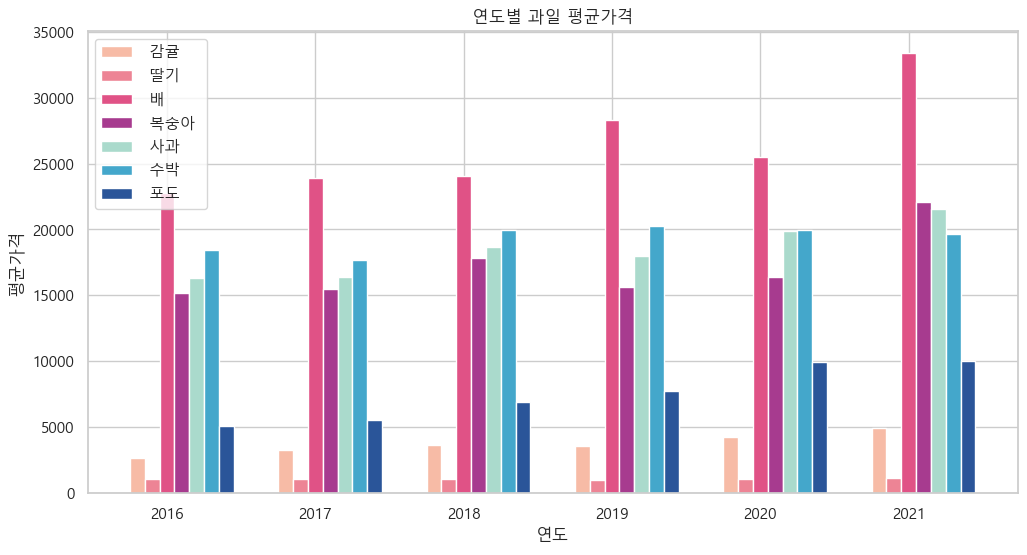

In [645]:
import pandas as pd
import matplotlib.pyplot as plt

df = result.copy()

# MultiIndex에서 각 레벨의 값들을 가져오기
years = df.index.get_level_values('연도').unique()
fruits = df.index.get_level_values('과일이름').unique()

# 다중 막대 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.1  # 막대 너비
opacity = 1
colors = ['#f7bba6', '#ed8495', '#e05286', '#a73b8f', '#aadacc', '#44a7cb', '#2a5599']  # 색상 리스트

# 각 연도별로 각 과일에 대한 '판매량'과 '평균가격'을 다중 막대 그래프로 표현
for i, fruit in enumerate(fruits):
    x_positions = range(len(years))
    prices = df.loc[fruit, '평균가격']

    # '평균가격' 막대 그래프
    ax.bar([pos + bar_width/2 + i*bar_width for pos in x_positions], prices, bar_width,
           alpha=opacity, label=f'{fruit}', color=colors[i])

# X 축에 과일 이름 표시
ax.set_xticks([pos + bar_width*(len(years)-1)/2 for pos in x_positions])
ax.set_xticklabels(years)

ax.set_xlabel('연도')
ax.set_ylabel('평균가격')
ax.set_title('연도별 과일 평균가격')
ax.legend()

plt.show()

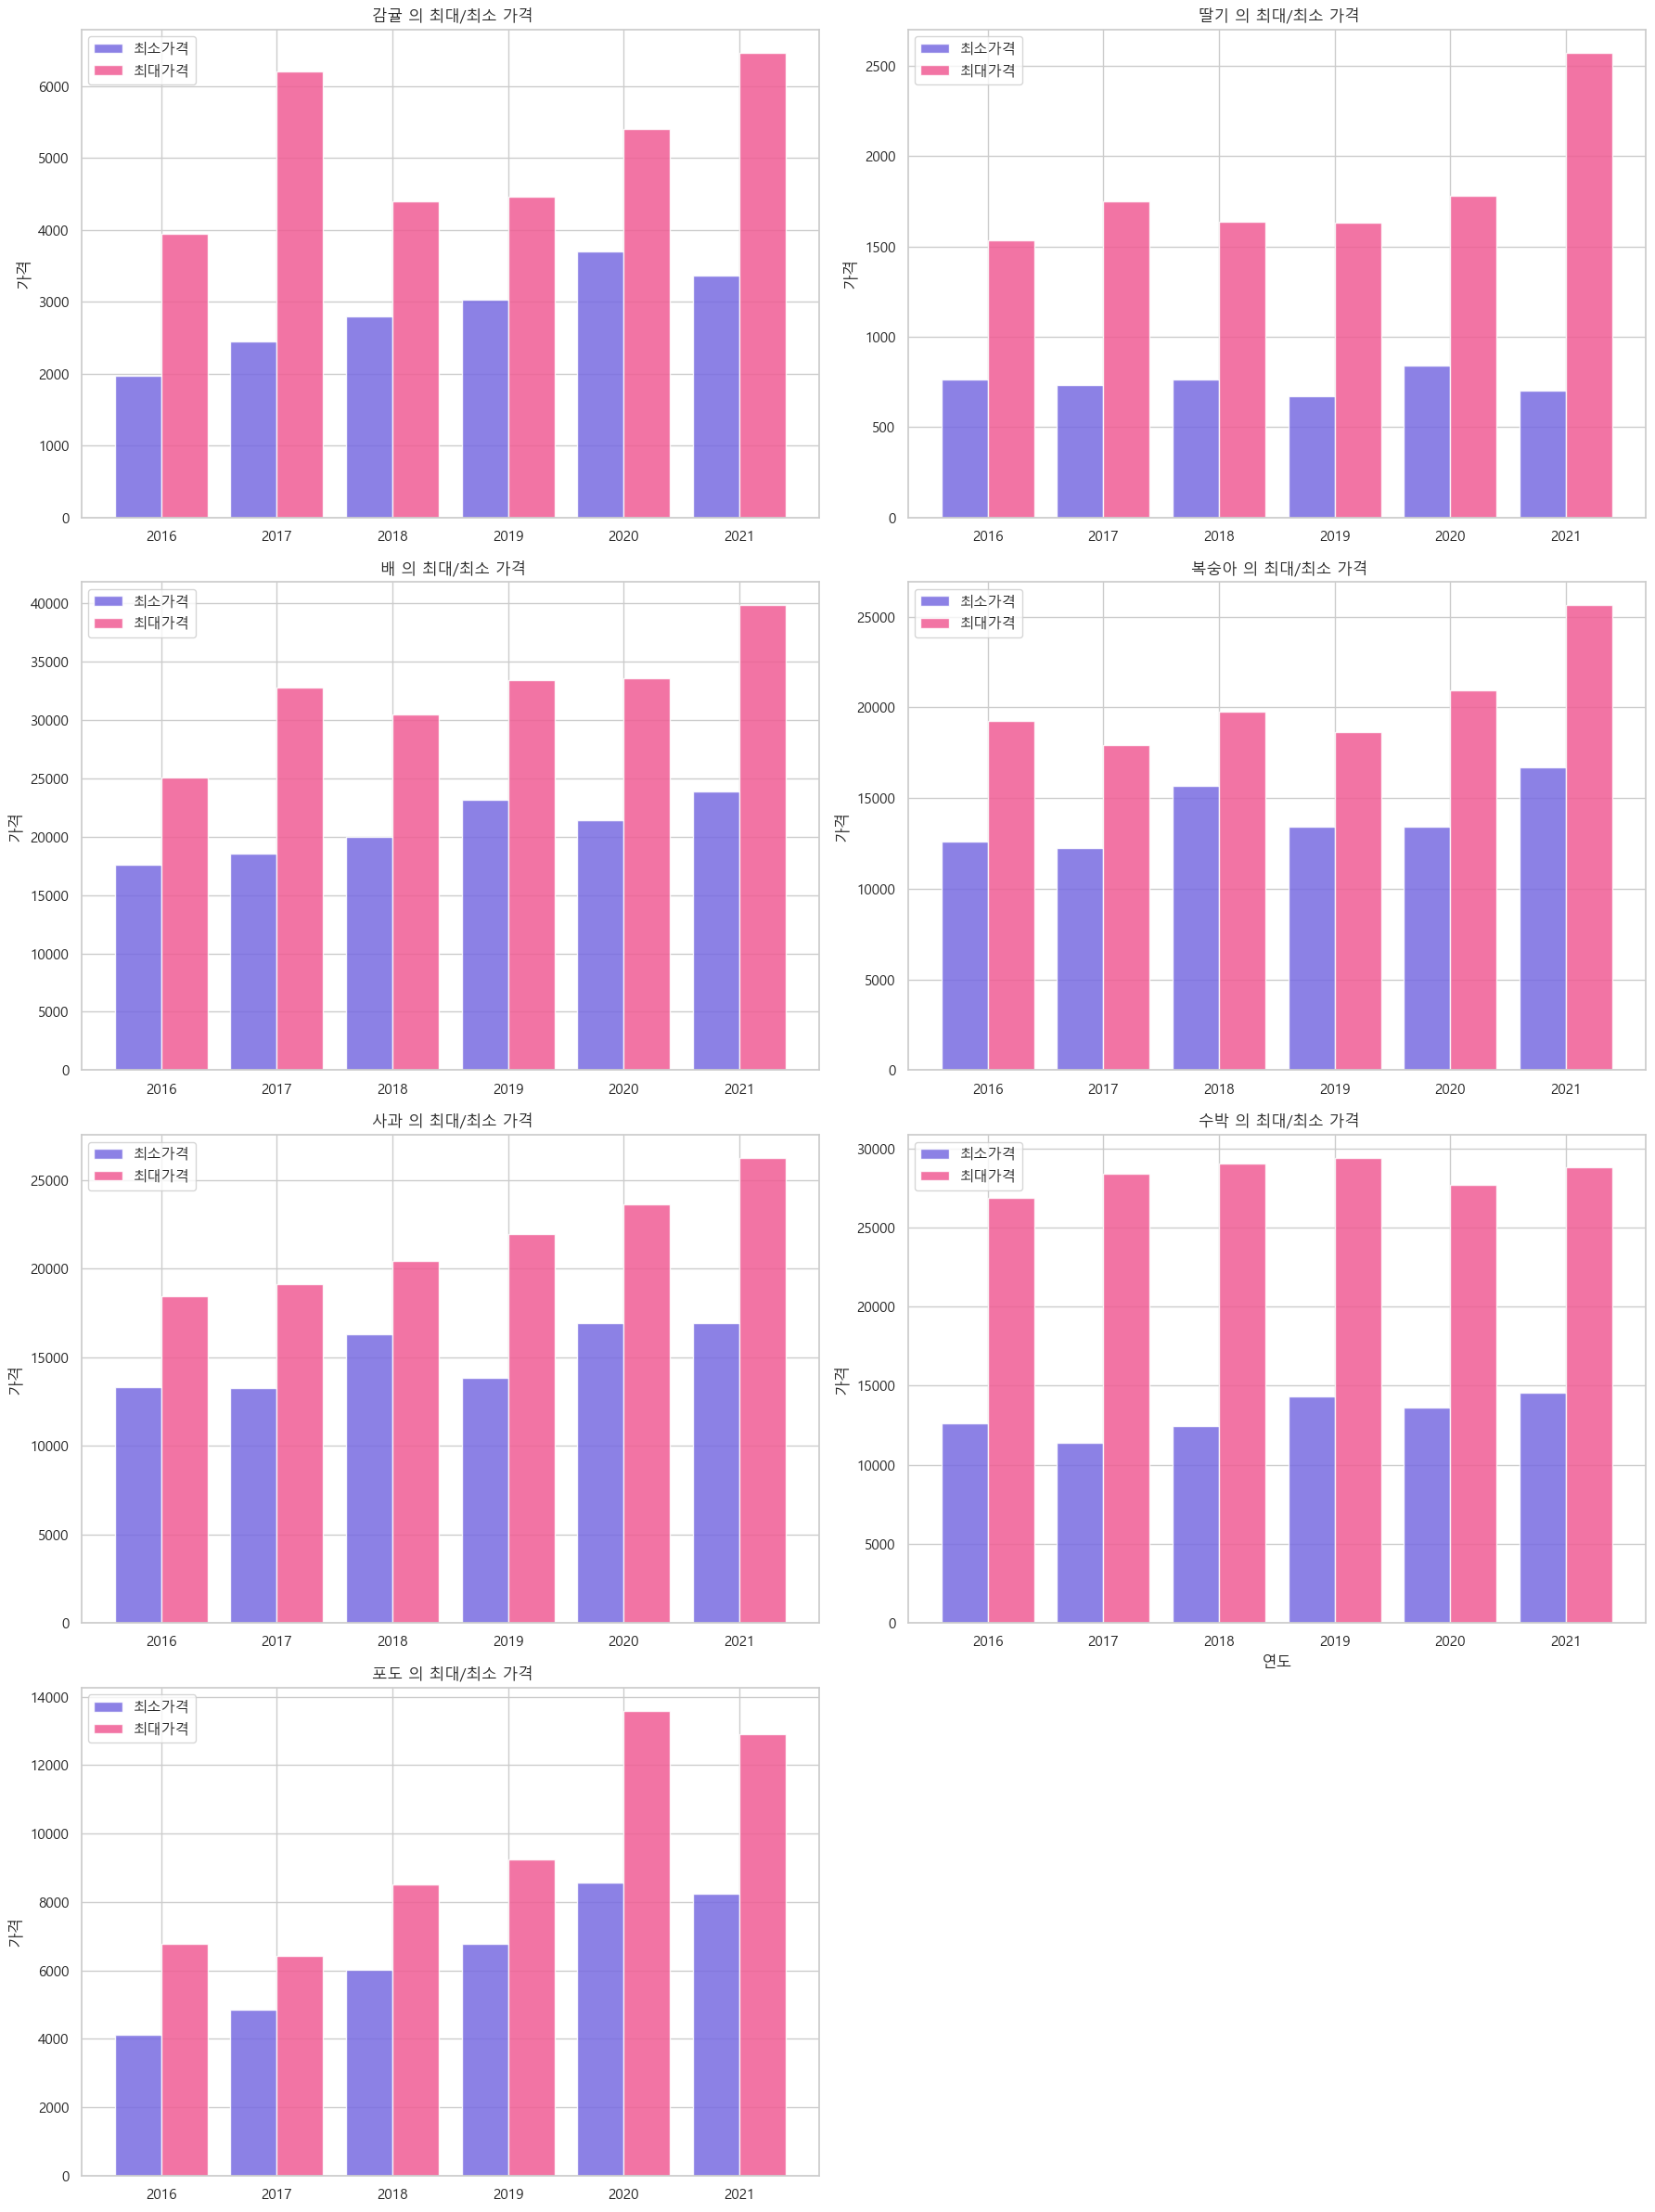

In [646]:
fig = plt.figure(figsize=(18, 24))

# 서브플롯
ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)

# 각 과일에 대해 서브플롯에 최대가격과 최소가격을 다중 바 그래프로 그림
for ax, fruit in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7], fruits):
    min_prices = df.loc[fruit, '최소가격']
    max_prices = df.loc[fruit, '최대가격']

    # 바 차트 그리기
    ax.bar(years - 0.2, min_prices, width=0.4, label='최소가격', alpha=.85, color='#786be1')
    ax.bar(years + 0.2, max_prices, width=0.4, label='최대가격', alpha=.85, color='#f05c94')

    ax.set_title(f'{fruit}의 최대/최소 가격')
    ax.set_ylabel('가격')
    ax.legend()

# X 축 연도 표시
ax6.set_xticks(years)
ax6.set_xticklabels(years)
ax6.set_xlabel('연도')

plt.tight_layout()
plt.show()

### [ 과일별 가격 변동 추이 ]

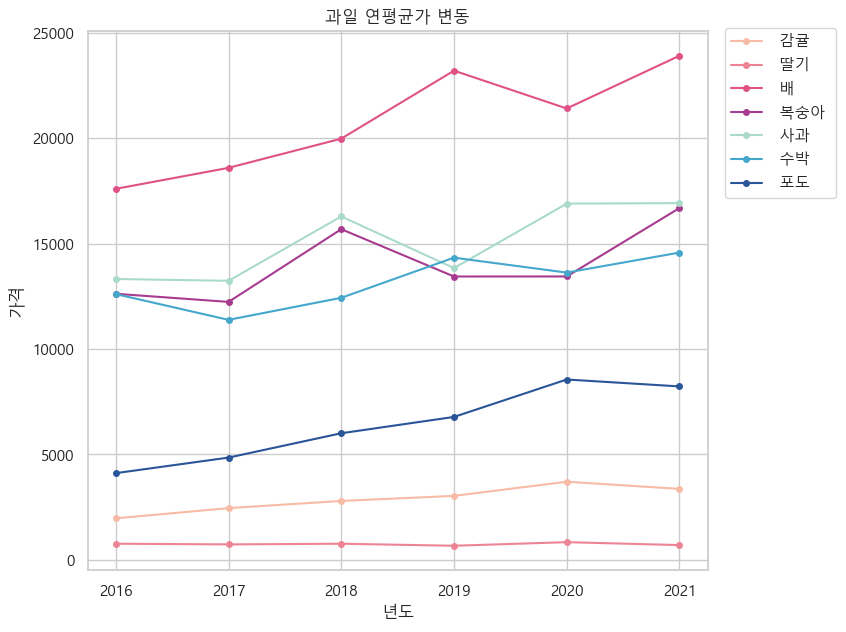

In [647]:
# 과일별 연평균가 변동추이 그래프 그리기
colors = ['#f7bba6', '#ed8495', '#e05286', '#a73b8f', '#aadacc', '#44a7cb', '#2a5599']  # 색상 리스트
for i, fruit in enumerate(fruits):
    fruit_df = result[colum_names[2]].xs(fruit, level='과일이름')
    fruit_df.plot(kind='line', marker='o', markersize=4, figsize=(8, 7), label=fruit, color=colors[i])

plt.title('과일 연평균가 변동')
plt.xlabel('년도')
plt.ylabel('가격')
plt.legend(title='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.02))
plt.show()

결과: 감귤과 딸기의 가격변동은 크게 없었으며, 가장 큰 가격 변동을 보인 품목은 "배"이다.

## 2-2. 과일 가격과 식품 물가 상관 관계 분석

In [648]:
# 파일 경로와 시트명 설정
file_path2 = '물가상승률.xlsx' # 파일경로

# Excel 파일 읽기 : 연령별 데이터
price=pd.read_excel(file_path2,
                   header=2,
                   index_col = 0,
                   skipfooter=3)

# 데이터프레임 확인
price

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
소비자물가 총지수(2020=100),91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5
소비자물가상승률(%),2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5
식료품/비주류음료,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9
주류 및 담배,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4
의류 및 신발,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6
주택 ·수도 · 전기 및 연료,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6
가정용품 및 가사 서비스,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9
보건,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1
교통,3.2,-0.5,-1.6,-7.8,-2.2,3.6,2.4,-1.8,-1.8,6.3
통신,-2.6,-0.1,-0.1,-0.2,0.1,0.3,-0.9,-2.3,-2.1,-0.9


In [649]:
# 필요한 데이터만 추출
price_df = price.loc[['식료품/비주류음료'],'2016':]
price_df

,2016,2017,2018,2019,2020,2021
식료품/비주류음료,2.3,3.4,2.8,0.0,4.4,5.9


In [650]:
# x축 y축 치환
price_df = price_df.T

In [651]:
# 컬럼명 변경
price_df = price_df.rename(columns={'식료품/비주류음료':'식품물가'})

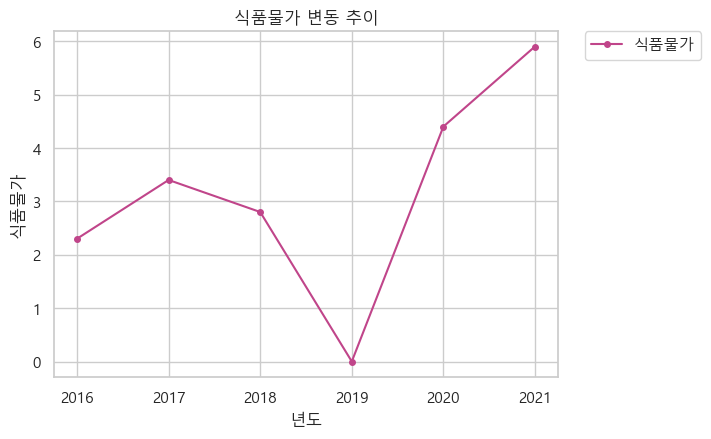

In [652]:
# 식품물가 변동 추이 그래프 그리기
price_df.plot(kind='line', marker='o', markersize=4, figsize=(6.5, 4.5), label=fruit, color='#c0458a')
plt.title('식품물가 변동 추이')
plt.xlabel('년도')
plt.ylabel('식품물가')
plt.legend(title='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
plt.show()

In [653]:
price_df

,식품물가
2016,2.3
2017,3.4
2018,2.8
2019,0.0
2020,4.4
2021,5.9


In [654]:
# 인덱스 데이터 타입 확인
price_comp_df = price_df.copy()
price_comp_df
print(price_comp_df.index.dtype)

object


In [655]:
# 인덱스 데이터 타입 변경
price_comp_df.index = price_comp_df.index.astype(int)
print(price_comp_df.index.dtype)

int64


In [656]:
# 데이터 프레임 합치기
new = pd.DataFrame()

# 각 과일에 대한 평균가격 열 추가
for fruit in fruits:
    new[fruit] = result.xs(fruit, level='과일이름')['평균가격']

new.index.name = ''

# 결과 출력
print(new)

result_df = pd.merge(new, price_comp_df, left_index=True, right_index=True, how='outer')

# 결과 출력
result_df

          감귤      딸기         배      복숭아        사과       수박       포도 
                                                                    
2016  2680.00  1071.5  22771.00  15193.0  16295.33  18417.5  5090.07
2017  3259.50  1087.5  23908.75  15496.5  16361.33  17703.5  5552.71
2018  3663.00  1072.5  24062.25  17834.5  18703.50  19965.0  6915.67
2019  3611.00  1020.0  28262.50  15614.0  18023.17  20238.0  7784.62
2020  4248.50  1096.0  25507.25  16366.0  19856.00  19957.0  9985.70
2021  4957.75  1179.0  33359.00  22065.0  21546.17  19684.5  9997.05


,감귤,딸기,배,복숭아,사과,수박,포도,식품물가
,,,,,,,,
2016,2680.00,1071.5,22771.00,15193.0,16295.33,18417.5,5090.07,2.3
2017,3259.50,1087.5,23908.75,15496.5,16361.33,17703.5,5552.71,3.4
2018,3663.00,1072.5,24062.25,17834.5,18703.50,19965.0,6915.67,2.8
2019,3611.00,1020.0,28262.50,15614.0,18023.17,20238.0,7784.62,0.0
2020,4248.50,1096.0,25507.25,16366.0,19856.00,19957.0,9985.70,4.4
2021,4957.75,1179.0,33359.00,22065.0,21546.17,19684.5,9997.05,5.9


### [ 과일 가격과 물가 상관 관계 분석 ]

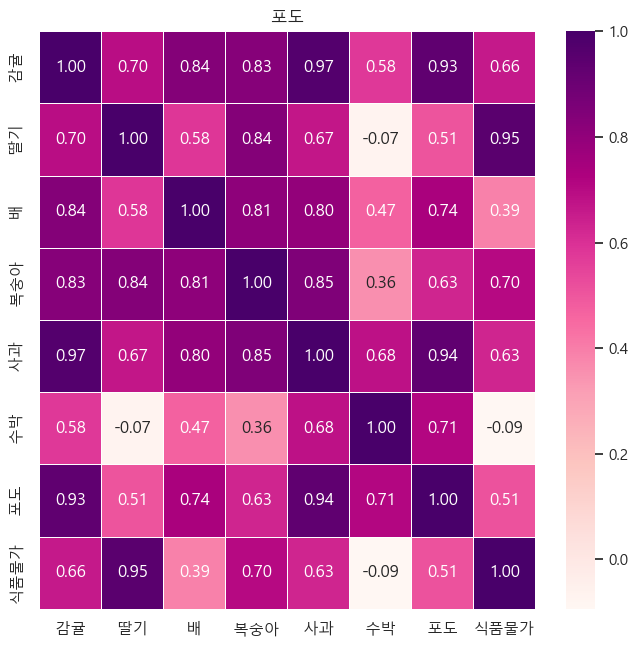

In [657]:
# 그래프 그리기
correlation_matrix = result_df.corr()

# 히트맵
plt.figure(figsize=(8, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5)
plt.title(fruit)
plt.show()

결과: 딸기의 경우 상관계수가 0.95로 관련이 높은 편이며, 감귤, 복숭아, 사과는 0.6 ~ 0,7 사이의 상관계수를 보였다. <br>
하지만 수박의 경우 음수의 결과를 보여 관련이 없는 편이다.

# 3. 과일별 판매량 분석

## 3-1. 홈플러스 크롤링

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import re

In [59]:
service = Service(executable_path="C:\chromedriver\chromedriver.exe")
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

url = 'https://front.homeplus.co.kr/list?categoryId=100001&categoryDepth=1' #과일
driver.get(url)

time.sleep(3)

dataList = [] # 상품정보를 담을 리스트

def readData():
    # 데이터 읽어오기
    elements = driver.find_elements(By.CSS_SELECTOR, '.unitItemBox')
    for element in elements:
        try:
            fruitName = element.find_element(By.CSS_SELECTOR, '.css-12cdo53-defaultStyle-Typography-ellips').text
        except:
            fruitName = np.NaN
        try:
            monthly_purchase = element.find_element(By.XPATH, './/div[contains(@class, "prodScoreWrap")]/span[last()]').text
        except:
            monthly_purchase = np.NaN
        data = {'상품명': fruitName, '한달판매량': monthly_purchase}
        dataList.append(data)

cnt = 0
while True:
    readData() # 데이터 읽기
    next_page_buttons = driver.find_elements(By.CSS_SELECTOR, '.css-1ij9dss-number') # 현재 페이지를 제외한 페이징 버튼 수
    try:
        # cnt = cnt + 1
        # print(cnt,'페이지 출력완료')
        next_page_button = driver.find_element(By.CSS_SELECTOR, '.btnNext') # Next 버튼
        driver.execute_script("arguments[0].click();", next_page_button)
        time.sleep(1)  # 페이지가 로드되기를 기다림
    except Exception as e:
        print('No Next Button')
        for btn in next_page_buttons:
            # Next 버튼이 삭제 된 후의 처리(남은 pagination 클릭)
            # cnt = cnt + 1
            # print(cnt,'페이지 출력완료')
            driver.execute_script("arguments[0].click();", btn)
            time.sleep(1)  # 페이지가 로드되기를 기다림
            readData() # 데이터 읽기
        break
        
print('크롤링 끝', len(dataList), '개 데이터 수집 완료')

No Next Button
크롤링 끝 3585 개 데이터 수집 완료


In [60]:
df = pd.DataFrame(dataList)
df.tail()

df.to_csv('./fruits_info.csv') # csv 저장
print('csv 저장 완료')

csv 저장 완료


## 3-2. 품목별 판매량 시각화

In [659]:
df = pd.read_csv('./fruits_info.csv', encoding='utf-8', header=0, index_col=0)

print(df.shape)
df.head()

(3585, 2)


,상품명,한달판매량
0,신선농장 15Brix 샤인머스캣 1KG(박스),"월 7,215개 구매"
1,제주밀감 3KG(박스),"월 66,334개 구매"
2,고당도 스위트마운틴 바나나(필리핀) 송이,"월 52,478개 구매"
3,12Brix 데일리 문경 부사사과 4-6입(봉),"월 4,173개 구매"
4,10Brix 첫수확한 햇딸기 500G(팩),"월 14,010개 구매"


In [660]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

# 숫자 정제 함수 : 숫자 이외의 문자는 전부 제거
def num_cleaning(text):
    if pd.isna(text):  # NaN 값이면 0으로 대체
        return 0
    else:\
        # 숫자 정규표현식으로 숫자만 추출
        numbers = re.compile('[^0-9]+')
        result = numbers.sub('', text)
        return result

# 함수를 적용하여 상품명에서 한글만 추출
df['상품명'] = df['상품명'].apply(lambda x: text_cleaning(x))
df['한달판매량'] = df['한달판매량'].apply(lambda x: num_cleaning(x))

df.head(10)

,상품명,한달판매량
0,신선농장 샤인머스캣 박스,7215
1,제주밀감 박스,66334
2,고당도 스위트마운틴 바나나필리핀 송이,52478
3,데일리 문경 부사사과 입봉,4173
4,첫수확한 햇딸기 팩,14010
5,타이벡밀감 박스,36733
6,스테비아 대추방울토마토 팩,32429
7,대추방울토마토 박스,19231
8,슈퍼푸드 블루베리칠레 팩,16369
9,해금 골드 키위 입팩,6028


In [661]:
# 과일이름
fruits_name = ['수박', '딸기', '사과', '배', '복숭아', '포도', '샤인머스켓', '감귤']

# 특정 문자열이 포함되지 않은 행을 제거
filtered_dataList = df[df['상품명'].str.contains('|'.join(fruits_name))]

filtered_dataList.head()

,상품명,한달판매량
3,데일리 문경 부사사과 입봉,4173
4,첫수확한 햇딸기 팩,14010
13,배 입박스,5127
16,맛이 예쁜맛난이사과 봉,5951
21,맛난이 엔비 사과 입봉,8395


In [662]:
# 상품명 변경
for fruit in fruits_name:
    filtered_dataList.loc[filtered_dataList['상품명'].str.contains(fruit), '상품명'] = fruit

filtered_dataList.head()

C:\Users\dawoo\AppData\Local\Temp\ipykernel_42940\2396661907.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,상품명,한달판매량
3,사과,4173
4,딸기,14010
13,배,5127
16,사과,5951
21,사과,8395


In [663]:
print(filtered_dataList.dtypes)

상품명      object
한달판매량    object
dtype: object


In [664]:
# 데이터 타입 변경
filtered_dataList = filtered_dataList.astype({'상품명':'string', '한달판매량':'int'})

In [665]:
# 중복된 과일 이름의 한달 판매량 합산
new_df = filtered_dataList.groupby('상품명', as_index=False).sum()
new_df

,상품명,한달판매량
0,감귤,4240
1,딸기,18662
2,배,69607
3,복숭아,666
4,사과,93607
5,샤인머스켓,119
6,수박,615
7,포도,3910


In [666]:
# 상품명을 인덱스로 지정
new_df = new_df.set_index('상품명')
new_df

,한달판매량
상품명,
감귤,4240
딸기,18662
배,69607
복숭아,666
사과,93607
샤인머스켓,119
수박,615
포도,3910


In [667]:
# 샤인머스켓은 포도로 통합
new_df.loc['포도'] = new_df.loc['포도'] + new_df.loc['샤인머스켓']
new_df = new_df.drop('샤인머스켓', axis=0)

In [668]:
new_df = new_df.sort_values(by='한달판매량', ascending=False)
new_df

,한달판매량
상품명,
사과,93607
배,69607
딸기,18662
감귤,4240
포도,4029
복숭아,666
수박,615


In [669]:
new_df_copy = new_df.T

In [670]:
print(new_df_copy.shape)
new_df_copy

(1, 7)


상품명,사과,배,딸기,감귤,포도,복숭아,수박
한달판매량,93607,69607,18662,4240,4029,666,615


### [ 한달간 가장 많이 팔린 품목 순위 ]

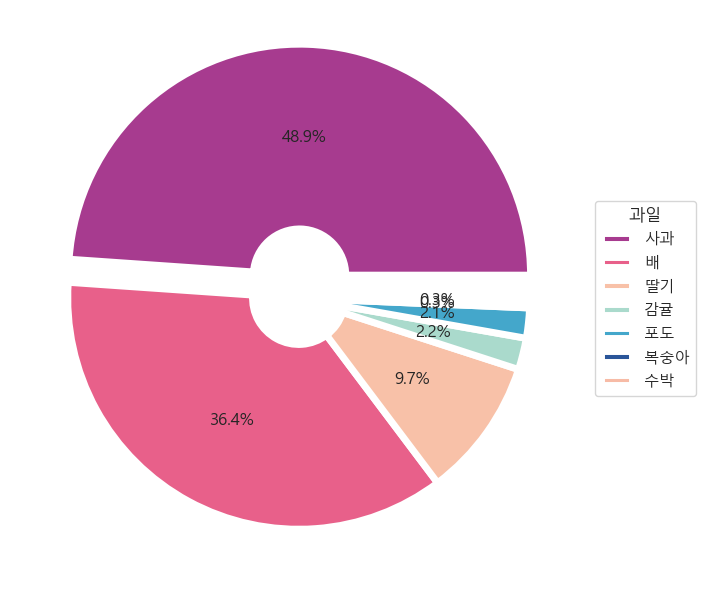

In [693]:
# 파이 차트 그리기
explode = [0.1, 0, 0, 0, 0, 0, 0]
colors = ['#a73b8f',  '#e8608a', '#f8c1a8', '#aadacc', '#44a7cb', '#2a5599', '#f7bba6',]  # 색상 리스트
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 7.5))
wedges, texts, autotexts = plt.pie(new_df_copy.loc['한달판매량'], labels=None, explode=explode, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.legend(wedges, new_df_copy.columns, title="과일", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.show()

# 4. 과일별 소비량

In [694]:
# 품종별 등급코드
kind_codes = ['AF0501', 'AF0503', 'AF0505', 'AF0506', 'AF0509', 'AF0507', 'AF0508']
# 221: 수박, 226: 딸기, 411: 사과, 412: 배, 413: 복숭아, 414: 포도, 415: 감귤

# API 요청 보내기
base_url = 'https://www.atfis.or.kr/home/api/consumption/basic.do'
apiKey = 'bfTU1VTsA1t5Uj00HMof83LQCjL/F5tvD4SdyrBUYj8='
beginYear = 2016
endYear = 2021

dfset2 = pd.DataFrame()  # 빈 데이터프레임

for kind_code in kind_codes: # 품종별 등급코드 순회
    try:
        # 요청
        response = requests.get(
            f'{base_url}?apiKey={apiKey}&cnsmpMtralCd={kind_code}&beginYear={beginYear}&endYear={endYear}'
        )
        # 응답 처리
        if response.status_code == 200:
            # JSON 데이터를 DataFrame으로 변환하여 dfset2에 추가
            data = response.json()
            df_temp = pd.DataFrame(data)
            dfset2 = pd.concat([dfset2, df_temp], ignore_index=True)
        else:
            print('Error occurred:', response.status_code)

    except requests.exceptions.RequestException as e:
        print('Request failed:', e)
    except Exception as e:
        print('An error occurred:', e)
        
dfset2.head()

,cnsmpYear,cnsmpCd,cnsmpMtralUpperNm,cnsmpMtralNm,cnsmpTotUsgqty,cnsmpLocalusgqty,cnsmpImportUsgqty,cnsmpLocalRelimp
0,2021,AF0501,과일.채소류 및 과일 채소류 유래식품 소재,수박,265.0,265.0,0.0,100.0
1,2020,AF0501,과일.채소류 및 과일 채소류 유래식품 소재,수박,351.0,351.0,0.0,0.1
2,2019,AF0501,과일.채소류 및 과일 채소류 유래식품 소재,수박,297.0,297.0,0.0,100.0
3,2018,AF0501,과일.채소류 및 과일 채소류 유래식품 소재,수박,9.0,9.0,0.0,100.0
4,2017,AF0501,과일.채소류 및 과일 채소류 유래식품 소재,수박,30.0,30.0,0.0,100.0


In [695]:
#데이터 확인
print(dfset2.shape)
print(dfset2.index)
print(dfset2.columns)
print(dfset2['cnsmpMtralNm'].unique())

(42, 8)
RangeIndex(start=0, stop=42, step=1)
Index(['cnsmpYear', 'cnsmpCd', 'cnsmpMtralUpperNm', 'cnsmpMtralNm',
       'cnsmpTotUsgqty', 'cnsmpLocalusgqty', 'cnsmpImportUsgqty',
       'cnsmpLocalRelimp'],
      dtype='object')
['수박' '딸기' '사과' '배' '복숭아' '포도' '감귤']


In [697]:
#불필요한 데이터 제거
dfset2_copy = dfset2.drop(columns=['cnsmpCd', 'cnsmpMtralUpperNm', 'cnsmpLocalRelimp'])
dfset2_copy.columns=['연도', '과일', '총 소비량', '국산', '수입산']
dfset2_copy.head(10)

,연도,과일,총 소비량,국산,수입산
0,2021,수박,265.0,265.0,0.0
1,2020,수박,351.0,351.0,0.0
2,2019,수박,297.0,297.0,0.0
3,2018,수박,9.0,9.0,0.0
4,2017,수박,30.0,30.0,0.0
5,2016,수박,65.0,65.0,0.0
6,2021,딸기,23095.0,21454.0,1640.0
7,2020,딸기,24472.0,24041.0,431.0
8,2019,딸기,24669.0,24205.0,464.0
9,2018,딸기,28778.0,26997.0,1780.0


In [698]:
# 데이터 타입 변경
dfset2_copy = dfset2_copy.astype({'연도':'int', '과일':'string', '총 소비량':'int', '국산':'int', '수입산':'int'})

In [699]:
# 그룹화
dfset2_gr = dfset2_copy.groupby(['과일','연도']).sum()
dfset2_gr

총 소비량      국산   수입산
과일  연도                        
감귤  2016  141419  141419     0
    2017  129091  129091     0
    2018  147250  147239    11
    2019  141042  141042     0
    2020  143496  143496     0
    2021  137601  137601     0
딸기  2016   24595   21869  2726
    2017   24425   22528  1897
    2018   28778   26997  1780
    2019   24669   24205   464
    2020   24472   24041   431
    2021   23095   21454  1640
배   2016   11270   11270     0
    2017   10639   10639     0
    2018   13386   13386     0
    2019   16365   16350    15
    2020   16294   16283    11
    2021   12512   12512     0
복숭아 2016    9455     992  8463
    2017    8877     585  8292
    2018    6717     517  6200
    2019    5906    1776  4130
    2020    5896    1505  4392
    2021    5459    1089  4370
사과  2016   35444   35444     0
    2017   32564   32551    13
    2018   38635   38624    11
    2019   43063   42863   200
    2020   49610   49610     0
    2021   49437   49437     0
수박  2016      65      65     0
    2017      30      30     0
    2018       9       9     0
    2019     297     297     0
    2020     351     351     0
    2021     265     265     0
포도  2016    5446    5446     0
    2017    6588    6546    43
    2018    6096    6061    36
    2019    5831    5663   168
    2020    5859    5654   205
    2021    6393    6127   266

In [700]:
# 과일명과 컬럼 분리
fruits = dfset2_gr.index.get_level_values('과일').unique()
years = dfset2_gr.index.get_level_values('연도').unique()

colum_names = dfset2_gr.columns
print(fruits)
print(years)
print(colum_names)

Index(['감귤', '딸기', '배', '복숭아', '사과', '수박', '포도'], dtype='string', name='과일')
Int64Index([2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='연도')
Index(['총 소비량', '국산', '수입산'], dtype='object')


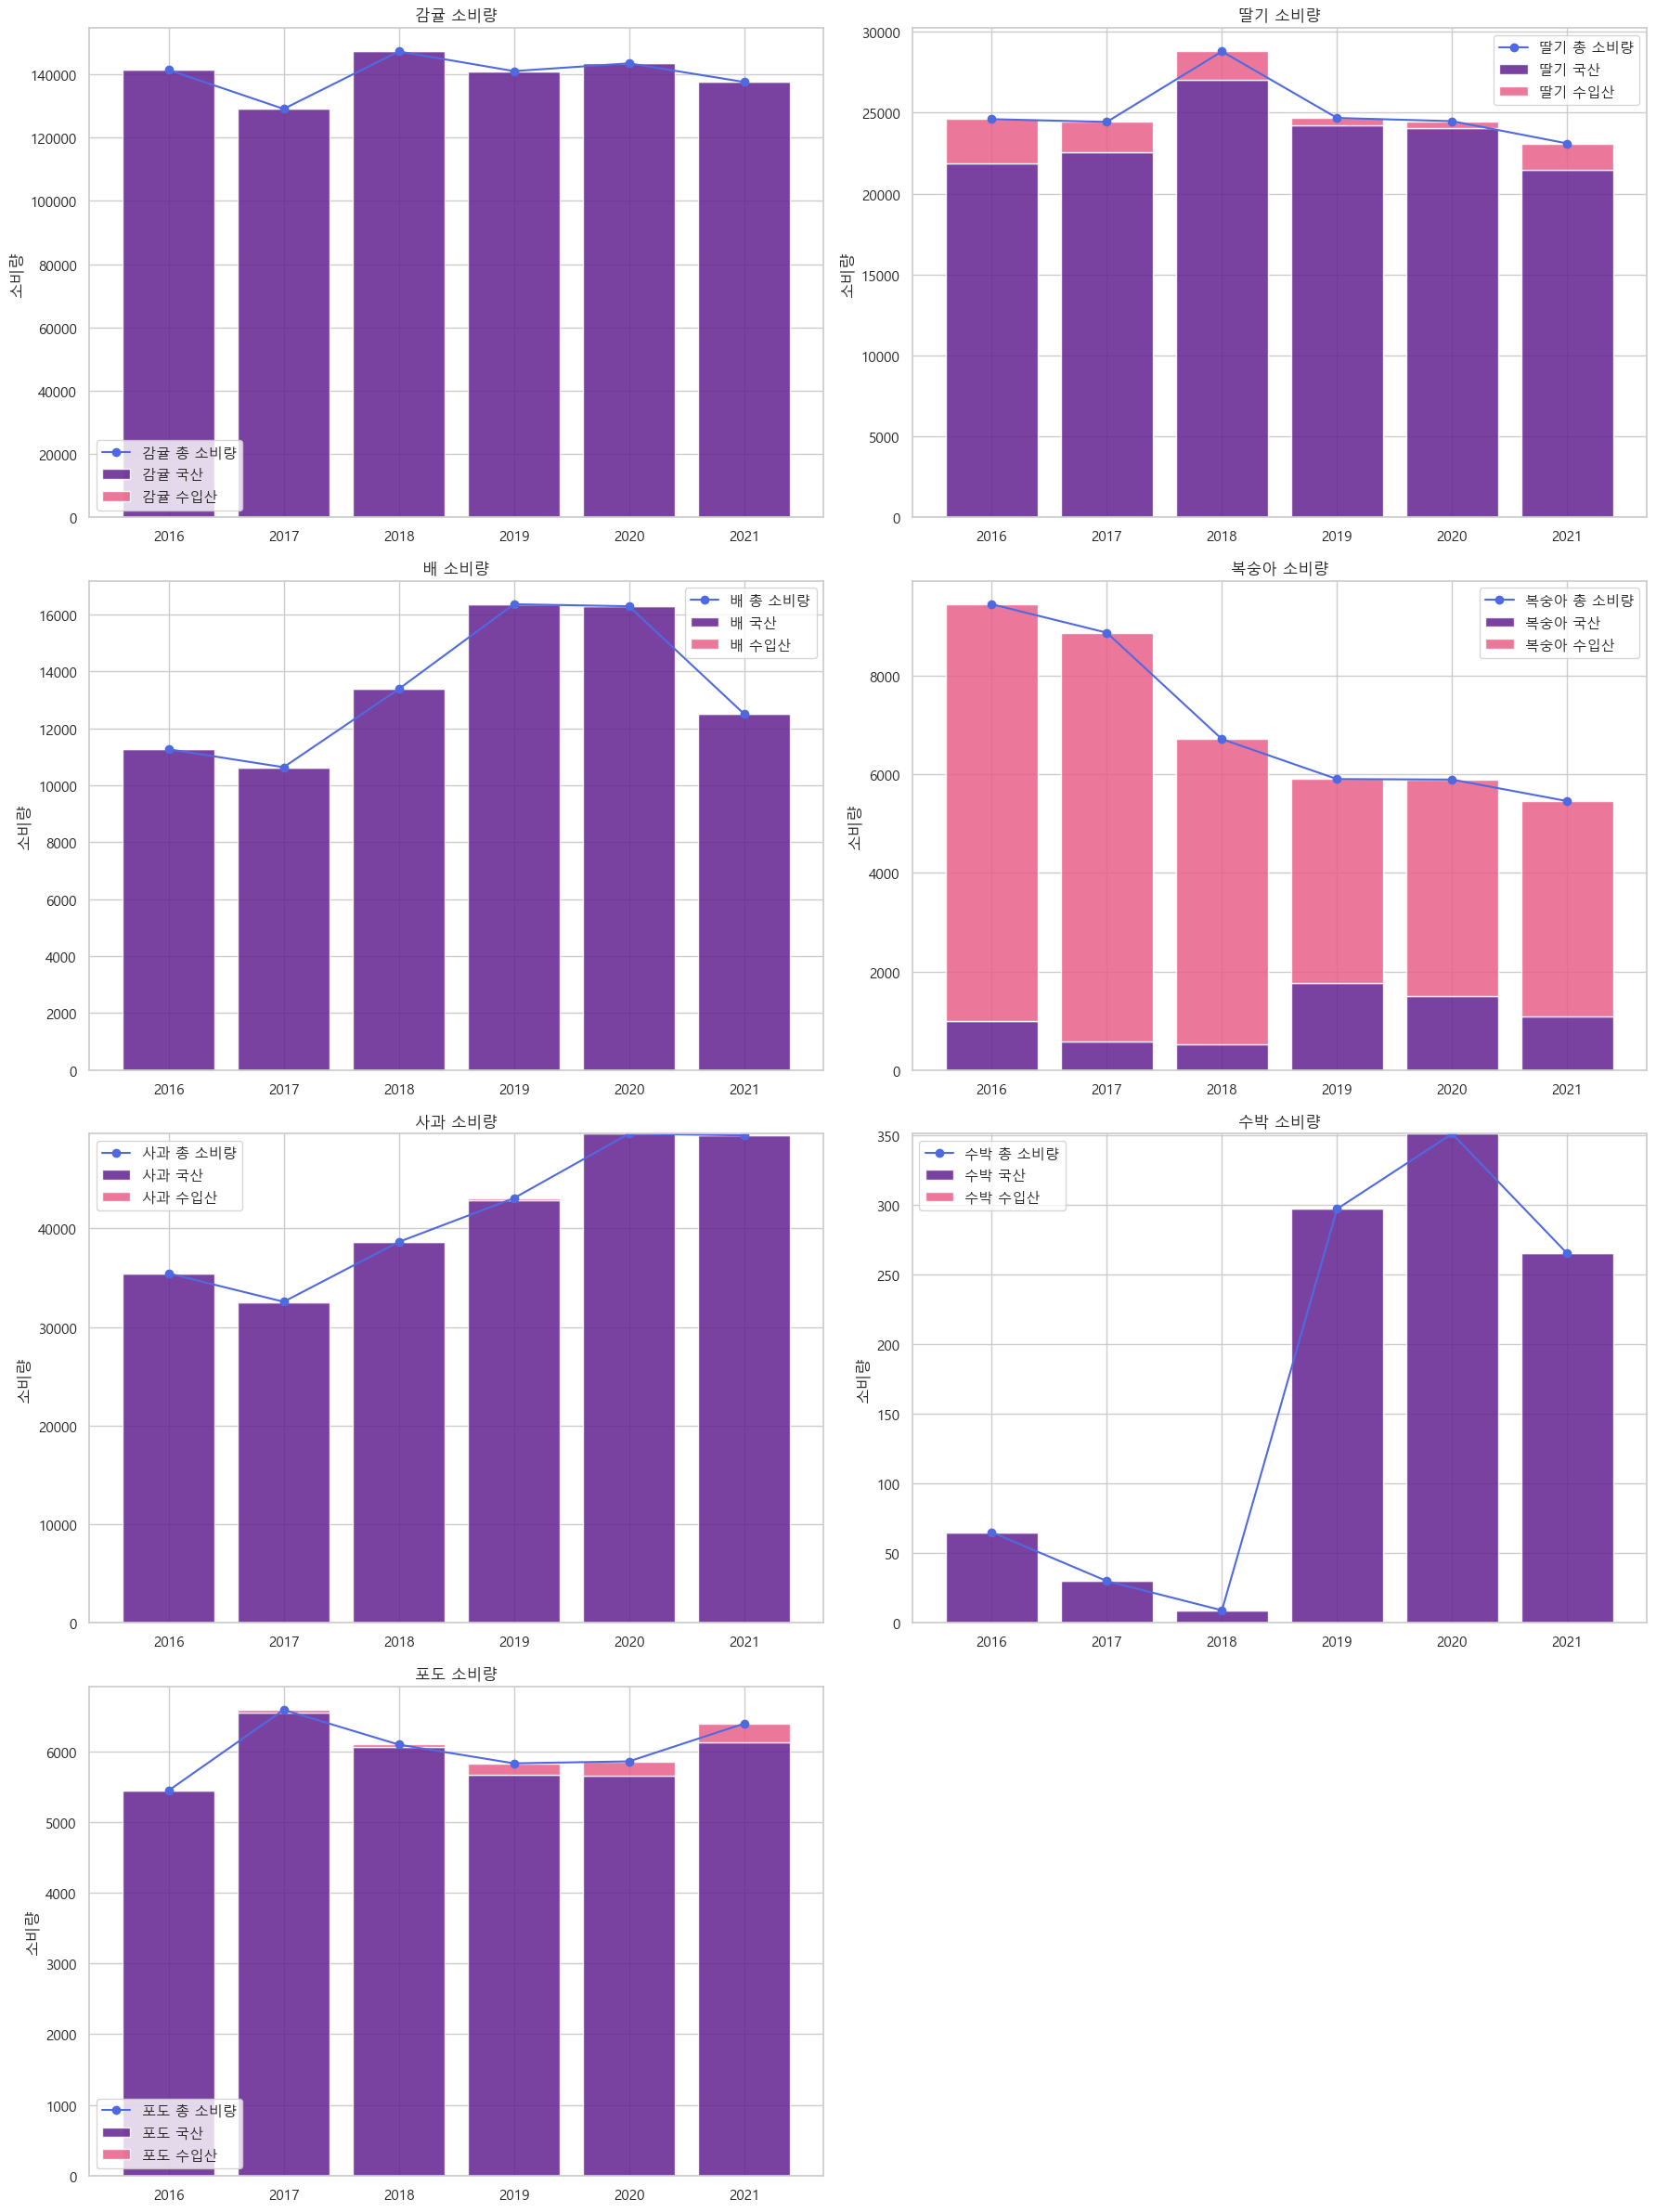

In [701]:
fig = plt.figure(figsize=(18, 24))

# 서브플롯
ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)

# 각 과일에 대해 국산 소비량과 수입 소비량을 다중 바 그래프로 그림
for ax, fruit in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7], fruits):
    domestic_consumption = dfset2_gr.loc[fruit, '국산']
    import_consumption = dfset2_gr.loc[fruit, '수입산']

    # 바 차트 그리기
    ax.bar(years, domestic_consumption, label=f'{fruit} 국산', alpha=.85, color='#63218f')
    ax.bar(years, import_consumption, label=f'{fruit} 수입산', bottom=domestic_consumption, alpha=.85, color='#e8608a')
    
    # 선 그래프 그리기 (총 소비량)
    total_consumption = dfset2_gr.loc[fruit, '총 소비량']
    ax.plot(years, total_consumption, label=f'{fruit} 총 소비량', color='#4f6ae0', marker='o')

    ax.set_title(f'{fruit} 소비량')
    ax.set_ylabel('소비량')
    ax.legend()

plt.tight_layout()
plt.show()

# 5. 과일 재배지 분포 시각화 

## ※ 데이터 준비
[ 농가리스트 데이터 설명 ] <br>
자료명 : 농가리스트 <br>
파일명 : 농가리스트_과실류.xls, 농가리스트_과일과채류.xls  <br>

In [7]:
# 파일 경로와 시트명 설정
file_path1 = '농가리스트_과실류.xls' # 파일경로1

# Excel 파일 읽기 : 농가리스트_과실류
nong_list1 = pd.read_excel(file_path1, 
                   header=1)

# 데이터프레임 확인
print(nong_list1.shape)
nong_list1

(1865, 5)


,조직유형,농가명,생산품목,소재지,전화번호
0,농협,제주감귤농업협동조합,감귤,제주특별자치도 서귀포시 강정동155 제주감귤농협,064-739-5401
1,농협,제주지역조합공동사업법인,감귤,제주특별자치도 제주시 삼도일동794-3,064-720-1335
2,농협,김해시조합공동사업법인,단감,경상남도 김해시 서상동48-2,055-327-1500
3,농협,농협경제지주㈜경남지역본부,단감,경상남도 창원시 성산구 신월동95,055-268-1622
4,농협,청도군조합공동사업법인,떫은감,경상북도 청도군 화양읍 유등리,054-373-4983
...,...,...,...,...,...
1860,온라인농가,일월성농원,포도,경기 화성시 마도면,-
1861,온라인농가,천삼농장,포도,경기 화성시 송산면,-
1862,온라인농가,함안왕포도,포도,-,-
1863,온라인농가,산남감귤영농조합법인,하우스감귤,-,064-733-4855


In [8]:
file_path2 = '농가리스트_과일과채류.xls' # 파일경로2

# Excel 파일 읽기 : 농가리스트_과일과채류
nong_list2 = pd.read_excel(file_path2, 
                   header=1)

# 데이터프레임 확인
print(nong_list2.shape)
nong_list2

(663, 5)


,조직유형,농가명,생산품목,소재지,전화번호
0,농협,논산시농협조합공동사업법인,딸기,충청남도 논산시 연산면 청동리467,041-735-8602
1,농협,농업회사법인주식회사조이팜,딸기,경상남도 산청군 단성면 사월리25-2,055-973-1033
2,농협,농협경제지주㈜하동군연합사업단,딸기,경상남도 하동군 하동읍 읍내리34,055-883-1142
3,농협,곡성군연합사업단,메론,전라남도 곡성군 곡성읍 읍내리264,061-360-4708
4,일반법인,광일영농조합,수박,경상남도 함안군 법수면 강주리1339-1,055-582-5440
...,...,...,...,...,...
658,온라인농가,아침이슬농원,토마토,경기 고양시 일산동구,-
659,온라인농가,여가의뜰,토마토,강원 고성군 간성읍,-
660,온라인농가,은평영농,토마토,강원 원주시 신림면,-
661,온라인농가,제일농장,토마토,전북 순창군 금과면,063-652-6446


In [9]:
# 두 테이블 연결
nong_list = pd.concat([nong_list1, nong_list2])
nong_list.shape

(2528, 5)

In [12]:
# 결측치 제거
nong_list = nong_list.replace('-',np.nan)
nong_list = nong_list.dropna(subset=['생산품목', '소재지'])
nong_list.shape

(2455, 5)

In [13]:
# 중복행 체크
nong_list.duplicated(subset=['생산품목', '소재지']).sum()

872

In [14]:
# 중복행 제거
nong_list = nong_list.drop_duplicates(subset=['생산품목', '소재지'])
print(nong_list.shape)
print(nong_list.duplicated(subset=['생산품목', '소재지']).sum())

(1583, 5)
0


In [15]:
# 소재지 시 데이터 추출 1
nong_list['소재지'] = nong_list['소재지'].str.split(' ').str[0]
nong_list

,조직유형,농가명,생산품목,소재지,전화번호
0,농협,제주감귤농업협동조합,감귤,제주특별자치도,064-739-5401
1,농협,제주지역조합공동사업법인,감귤,제주특별자치도,064-720-1335
2,농협,김해시조합공동사업법인,단감,경상남도,055-327-1500
3,농협,농협경제지주㈜경남지역본부,단감,경상남도,055-268-1622
4,농협,청도군조합공동사업법인,떫은감,경상북도,054-373-4983
...,...,...,...,...,...
655,온라인농가,부자농원,토마토,강원,033-481-0822
656,온라인농가,새달달농장,토마토,경남,NaN
658,온라인농가,아침이슬농원,토마토,경기,NaN
659,온라인농가,여가의뜰,토마토,강원,NaN


In [16]:
nong_list_cp = nong_list.copy()

In [17]:
# 생산품목 고유값 확인
print(nong_list_cp['생산품목'].unique())

['감귤' '단감' '떫은감' '배' '복숭아' '사과(과실류)' '포도' '감' '감귤,만감' '감귤,한라봉' '과실류 기타'
 '과실류 기타,사과묘목          ' '과실류 묘목        ' '과실류 묘목        ,포도묘목          '
 '구지뽕' '기타묘목          ' '단감,떫은감' '떫은감,감귤' '떫은감,매실' '떫은감,자두' '레몬' '만감'
 '만감,망고' '망고' '매실' '매실,감' '매실,과실류 기타' '무화과' '바나나' '배,과실류 기타' '배,단감'
 '배,떫은감' '배,복숭아' '배묘목            ' '보리수' '복숭아,매실' '복숭아,석류'
 '복숭아묘목         ' '블루베리' '사과(과실류),떫은감' '사과(과실류),매실' '사과(과실류),복숭아'
 '사과(과실류),사과묘목          ' '사과묘목          ' '산자나무(비타민나무)' '석류' '선인장열매' '오디'
 '유자' '자두' '자두묘목          ' '참다래(키위)' '참다래(키위),매실' '체리' '탱자' '파파야' '패션푸룻'
 '포도,무화과' '포도,자두' '포도,포도묘목          ' '포도묘목          ' '한라봉' '감말랭이' '개복숭아'
 '거봉' '건자두' '구아바잎' '금감' '꾸지뽕나무' '돌배' '레드향' '무화과(일반)' '블랙베리' '블랙커런트' '비파'
 '아사이베리' '영귤' '용과' '유자(일반)' '천혜향' '청견' '청포도' '체리(일반)' '파인애플' '패션프루트(일반)'
 '플럼코트(일반)' '하귤' '하스카프(일반)' '홍자두' '황금향' '골드키위' '곶감' '기타' '백향' '사과' '아로니아'
 '카무카무' '딸기' '메론' '수박' '참외' '토마토' '과일과채류 기타' '딸기,과일과채류 기타' '방울토마토' '산딸기'
 '대추방울' '딸기(모종)' '송이토마토' '애플수박' '완숙토마토' '토마토묘']


In [20]:
# 생산품목 고유값 확인
print(nong_list_cp['소재지'].unique())

# 숫자는 np.nan으로 치환
def process_text(text):
    if re.search(r'\d', str(text)):  # 정규표현식으로 문자열에 숫자가 포함되어 있는지 확인
        return np.nan
    else:
        return text

# 함수 호출
nong_list_cp['소재지'] = nong_list['소재지'].apply(process_text)

nong_list_cp.dropna(inplace=True)

# 생산품목 고유값 확인
print(nong_list_cp['소재지'].unique())

['제주특별자치도' '경상남도' '경상북도' '경기도' '충청남도' '전라북도' '충청북도' '688-31' '대구' '48'
 '충북' '전라남도' '인천광역시' '강원도' '세종특별자치시' '대전광역시' '광주광역시' '대구광역시' '울산광역시'
 '서울특별시' '부산광역시' '제주' '경남' '경북' '강원' '전남' '충남' '경기' '전북' '인천' '전남보성군']
['제주특별자치도' '경상남도' '경상북도' '경기도' '충청남도' '전라북도' '충청북도' '대구' '충북' '세종특별자치시'
 '강원도' '대전광역시' '전라남도' '서울특별시' '울산광역시' '부산광역시' '경남' '경북' '강원' '전남' '충남'
 '경기' '전북' '인천' '제주' '광주광역시' '대구광역시']


In [21]:
# 명칭 변경
nong_list_cp.loc[nong_list_cp['소재지'] == '대구', '소재지'] = '대구광역시'
nong_list_cp.loc[nong_list_cp['소재지'] == '충북', '소재지'] = '충청북도'
nong_list_cp.loc[nong_list_cp['소재지'] == '강원', '소재지'] = '강원도'
nong_list_cp.loc[nong_list_cp['소재지'] == '경남', '소재지'] = '경상남도'
nong_list_cp.loc[nong_list_cp['소재지'] == '경북', '소재지'] = '경상북도'
nong_list_cp.loc[nong_list_cp['소재지'] == '전북', '소재지'] = '전라북도'
nong_list_cp.loc[nong_list_cp['소재지'] == '전남', '소재지'] = '전라남도'
nong_list_cp.loc[nong_list_cp['소재지'] == '경기', '소재지'] = '경기도'
nong_list_cp.loc[nong_list_cp['소재지'] == '충남', '소재지'] = '충청남도'
nong_list_cp.loc[nong_list_cp['소재지'] == '인천', '소재지'] = '인천광역시'
nong_list_cp.loc[nong_list_cp['소재지'] == '제주', '소재지'] = '제주특별자치도'

# 생산품목 고유값 확인
print(nong_list_cp['소재지'].unique())

['제주특별자치도' '경상남도' '경상북도' '경기도' '충청남도' '전라북도' '충청북도' '대구광역시' '세종특별자치시'
 '강원도' '대전광역시' '전라남도' '서울특별시' '울산광역시' '부산광역시' '인천광역시' '광주광역시']


In [22]:
map_data = nong_list_cp['소재지'].value_counts().reset_index()
map_data.columns = ['소재지', '농가수']
map_data

,소재지,농가수
0,경상남도,61
1,경상북도,49
2,전라남도,42
3,경기도,39
4,충청북도,28
5,전라북도,26
6,제주특별자치도,23
7,충청남도,23
8,강원도,14
9,세종특별자치시,4


In [23]:
map_data = map_data.astype({'소재지':'string', '농가수':'int64'})
print(map_data.dtypes)

소재지    string
농가수     int64
dtype: object


In [24]:
import json

# 경기도 시군구 경계 정보를 가진 json 파일
state_geo = './TL_SCCO_CTPRVN.json'

# # JSON 파일 읽기
sido_map = json.load(open(state_geo, encoding='utf-8'))
sido_map['features'][0]['properties']

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}

## 5-1.  과일 재배지 시각화

### [ 재배지 분포 ]

In [37]:
# plotly treemap 그래프 작성
import plotly.express as px
# Plotly Treemap 생성
fig = px.treemap(map_data, path=['소재지'], values='농가수', title='소재지별 농가수 트리맵', color_discrete_sequence=px.colors.qualitative.G10)

In [38]:
# 그래프 iframe으로 그리기 위한 api 설정
import plotly.express as px
import chart_studio

username = 'dawoony6071' # your username
api_key = 'Cl8XKUf9xbiT12fXtOTW' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [39]:
# 그래프 업로드
import chart_studio.plotly as py
py.plot(fig, filename='treemap', auto_open=True)

'https://plotly.com/~dawoony6071/1/'

In [40]:
# iframe 변환
import chart_studio.tools as tls
tls.get_embed('https://plotly.com/~dawoony6071/1/') #change to your url

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~dawoony6071/1.embed" height="525" width="100%"></iframe>'

In [41]:
# iframe 로드
from IPython.display import HTML

iframe_code = '<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~dawoony6071/1.embed" height="525" width="100%"></iframe>'

HTML(iframe_code)

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



### [ 재배지 분포 지도 시각화 ]

In [844]:
import folium

# 경기도 지도 만들기
g_map = folium.Map(location=[36,127],
zoom_start=7)

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(
                    geo_data=sido_map,  # 지도 경계
                    data=map_data,  # 표시하려는 데이터
                    columns=['소재지', '농가수'],  # 열 지정
                    name='농가수',
                    key_on='feature.properties.CTP_KOR_NM',  # geo-json 파일의 특정 속성을 기준으로 데이터 매핑
                    fill_color='YlOrRd',
                    fill_opacity=0.7,
                    line_opacity=0.3,
                    threshold_scale=[0, 10, 20, 30, 40, 50, 60, 70],
                  ).add_to(g_map)
g_map

# 6. 과일 특성에 따른 선호도 분류

# ※ 데이터 준비
[ 과일 1일 섭취량 데이터 설명 ] <br>
자료명 : 식품성분표 <br>
파일명 : 식품성분표(10개정판).xlsx <br>
시트명 : 국가표준식품성분 Database 10.1

### [ 데이터 수집 ]

In [742]:
import requests
import xmltodict
import json
import pandas as pd

# 품종별 코드
years = ['2016', '2017', '2018', '2019', '2020', '2021']
kind_codes = ['pear01', 'pear02']

# API 요청 보내기
url = 'http://apis.data.go.kr/1390804/Nihhs_Fruit_Pear_GrwhInfo/pearAnalsDataList'

fruit_pear = pd.DataFrame()  # 빈 데이터프레임
for year in years:
    for kind_code in kind_codes:
        params = {'serviceKey': 'rhKXU5xPur/LMP2M8j2kA/SY0OAo97wV4Br00ZJI92pJuhi5AsOBr1Xfc/HPASy3SJ+xlnzbgctADLwRg2LqNQ==', 'selyear': year, 'spciesCode': kind_code}
        try:
            # 요청
            response = requests.get(url, params=params)
            # 응답 처리
            if response.status_code == 200:
                xml_data=response.content
                # XML을 Python dictionary로 변환
                xml_dict = xmltodict.parse(xml_data)

                # Python dictionary를 JSON 문자열로 변환
                json_data = json.dumps(xml_dict, indent=2)

                # JSON 데이터를 DataFrame으로 변환
                df = pd.json_normalize(json.loads(json_data)['Response']['Body']['Model'])
                df['과일'] = '배'

                # fruit_pear에 추가
                fruit_pear = pd.concat([fruit_pear, df], ignore_index=True)
            else:
                print(f'Error occurred for year {year} and kind_code {kind_code}: {response.status_code}')

        except requests.exceptions.RequestException as e:
            print('Request failed:', e)
        except Exception as e:
            print('An error occurred:', e)

fruit_pear.head()


An error occurred: 'Response'


,farm_name,examin_datetm,avg_frut_wt,avg_lgdiamtr,avg_prbrd,avg_hrdnss,avg_brx,avg_prcn,과일
0,김제,2016-09-28,650.0,98.9,109.4,36.7,14.3,0.177,배
1,나주,2017-09-26,896.0,113.0,122.5,40.9,13.8,0.187,배
2,나주,2017-09-28,958.5,110.1,121.9,27.9,14.1,0.180,배
3,영천,2017-10-20,715.8,97.5,114.1,34.3,14.3,0.179,배
4,천안,2017-09-20,696.4,95.0,113.8,33.8,11.8,0.148,배


In [743]:
fruit_pear.to_csv('./fruit_pear.csv') # csv 저장
print('csv 저장 완료')

csv 저장 완료


In [744]:
# 복숭아 자료
# 품종별 코드
years = ['2016', '2017', '2018', '2019', '2020', '2021']
kind_codes = ['peach01', 'peach02', 'peach03']

# API 요청 보내기
url = 'http://apis.data.go.kr/1390804/Nihhs_Fruit_Peach_GrwhInfo/peachAnalsDataList'

fruit_peach = pd.DataFrame()  # 빈 데이터프레임
for year in years:
    for kind_code in kind_codes:
        params = {'serviceKey': 'rhKXU5xPur/LMP2M8j2kA/SY0OAo97wV4Br00ZJI92pJuhi5AsOBr1Xfc/HPASy3SJ+xlnzbgctADLwRg2LqNQ==', 'selyear': year, 'spciesCode': kind_code}
        try:
            # 요청
            response = requests.get(url, params=params)
            # 응답 처리
            if response.status_code == 200:
                xml_data=response.content
                # XML을 Python dictionary로 변환
                xml_dict = xmltodict.parse(xml_data)

                # Python dictionary를 JSON 문자열로 변환
                json_data = json.dumps(xml_dict, indent=2)

                # JSON 데이터를 DataFrame으로 변환
                df = pd.json_normalize(xml_dict['response']['body_Anals']['result_Anals'])
                df['과일'] = '복숭아'

                # dfset3에 추가
                fruit_peach = pd.concat([fruit_peach, df], ignore_index=True)
            else:
                print(f'Error occurred for year {year} and kind_code {kind_code}: {response.status_code}')

        except requests.exceptions.RequestException as e:
            print('Request failed:', e)
        except Exception as e:
            print('An error occurred:', e)

fruit_peach.head()

An error occurred: 
An error occurred: 
An error occurred: 
An error occurred: 
An error occurred: 


,farmName,examinDatetm,avgFrutWt,avgLgdiamtr,avgPrbrd,avgHrdnss,avgHrdnss2,avgHrdnss3,avgBrx,avgPrcn,avgCrdValue,avgCrd2Value,avgCrd3Value,과일
0,김제,2016-09-12,354.8,79.1,88.5,36.1,35.0,35.5,12.5,0.26,65.0,11.0,42.3,복숭아
1,김제,2016-09-08,352.8,78.7,88.8,43.1,47.5,45.3,12.9,0.25,64.3,10.7,42.5,복숭아
2,김제,2017-08-16,421.3,85.3,95.5,37.8,39.8,38.8,11.9,0.32,62.5,13.8,26.3,복숭아
3,이천,2017-08-17,386.5,76.1,93.5,16.7,17.9,17.3,12.7,0.36,69.9,4.3,28.6,복숭아
4,청도,2017-08-16,256.6,71.8,80.1,26.2,23.7,24.9,12.7,0.21,57.8,21.8,26.2,복숭아


In [745]:
fruit_peach.to_csv('./fruit_peach.csv') # csv 저장
print('csv 저장 완료')

csv 저장 완료


In [746]:
# 포도 자료
# 품종별 코드
years = ['2016', '2017', '2018', '2019', '2020', '2021']
kind_codes = ['grape01', 'grape02', 'grape03', 'grape04']

# API 요청 보내기
url = 'http://apis.data.go.kr/1390804/Nihhs_Fruit_Grape_GrwhInfo/grapeAnalsDataList'

fruit_grape = pd.DataFrame()  # 빈 데이터프레임
for year in years:
    for kind_code in kind_codes:
        params = {'serviceKey': 'rhKXU5xPur/LMP2M8j2kA/SY0OAo97wV4Br00ZJI92pJuhi5AsOBr1Xfc/HPASy3SJ+xlnzbgctADLwRg2LqNQ==', 'selyear': year, 'spciesCode': kind_code}
        try:
            # 요청
            response = requests.get(url, params=params)
            # 응답 처리
            if response.status_code == 200:
                xml_data=response.content
                # XML을 Python dictionary로 변환
                xml_dict = xmltodict.parse(xml_data)

                # Python dictionary를 JSON 문자열로 변환
                json_data = json.dumps(xml_dict, indent=2)

                # JSON 데이터를 DataFrame으로 변환
                df = pd.json_normalize(xml_dict['response']['body_Anals']['result_Anals'])
                df['과일'] = '포도'

                # dfset3에 추가
                fruit_grape = pd.concat([fruit_grape, df], ignore_index=True)
            else:
                print(f'Error occurred for year {year} and kind_code {kind_code}: {response.status_code}')

        except requests.exceptions.RequestException as e:
            print('Request failed:', e)
        except Exception as e:
            print(f'An error occurred for year {year} and kind_code {kind_code}: {e}')

fruit_grape.head()

An error occurred for year 2016 and kind_code grape01: 
An error occurred for year 2016 and kind_code grape04: 
An error occurred for year 2017 and kind_code grape01: 
An error occurred for year 2017 and kind_code grape04: 
An error occurred for year 2018 and kind_code grape01: 
An error occurred for year 2018 and kind_code grape04: 
An error occurred for year 2019 and kind_code grape01: 
An error occurred for year 2019 and kind_code grape02: 
An error occurred for year 2019 and kind_code grape04: 
An error occurred for year 2020 and kind_code grape04: 
An error occurred for year 2021 and kind_code grape01: 


,farmName,examinDatetm,avgFrutWt,avgFlshWgh,avgLgdiamtr,avgPrbrd,avgColorValue,avgBrx,avgPrcn,avgCrdValue,avgCrd2Value,avgCrd3Value,avgAnthoValue,과일
0,천안,2016-09-28,521.57,13.05,30.42,25.91,8.67,20.73,0.381,25.56,6.17,-0.41,0.0700793,포도
1,김제,2016-08-22,447.00,5.62,22.44,20.83,9.00,15.56,0.558,27.13,3.01,-2.13,0.2385955,포도
2,천안,2017-10-10,563.65,11.04,28.44,24.58,8.35,21.19,0.395,23.81,5.98,-0.54,0.0752715,포도
3,김제,2017-08-29,379.36,6.07,21.88,20.72,9.83,14.50,0.534,27.20,2.38,-2.20,0.1848284,포도
4,화성,2017-09-07,371.31,6.54,23.70,21.55,9.67,17.06,0.468,23.76,2.81,-1.26,0.3211184,포도


In [747]:
fruit_grape.to_csv('./fruit_grape.csv') # csv 저장
print('csv 저장 완료')

csv 저장 완료


In [748]:
# 감귤 자료
# 품종별 코드
years = ['2016', '2017', '2018', '2019', '2020', '2021']
farm_codes = ['01', '02', '04', '06', '07', '09', '12', '14', '16', '26', '29', '30', '31', '32']
#01:용흥, 02:성산, 04:토산, 06:아라, 07:무릉, 09:하원, 12:덕천, 14:신촌, 16:금악, 26:하례, 29:창천, 30:덕수, 31:신효, 32:신흥

# API 요청 보내기
url = 'http://apis.data.go.kr/1390804/Nihhs_Fruit_Citrus_GrwhInfo/citrusFrutfrutAnals'

fruit_gul = pd.DataFrame()  # 빈 데이터프레임
for year in years:
    for farm_code in farm_codes:
        params = {
            'serviceKey': 'rhKXU5xPur/LMP2M8j2kA/SY0OAo97wV4Br00ZJI92pJuhi5AsOBr1Xfc/HPASy3SJ+xlnzbgctADLwRg2LqNQ==', 
            'selyear': year, 'farmCode' : farm_code, 'numOfRows' : '10', 'pageNo' : '1'
        }
        try:
            # 요청
            response = requests.get(url, params=params)
            
            # 응답 처리
            if response.status_code == 200:
                xml_data = response.content
                
                # XML을 Python dictionary로 변환
                xml_dict = xmltodict.parse(xml_data)
                
                # 'Response.Body.Model' 안에 'Model' 키가 있는 경우
                if 'Model' in xml_dict['Response']['Body']:
                    data_list = xml_dict['Response']['Body']['Model']
                    
                    # 'Model' 키 안에 여러 개의 데이터가 리스트 형태로 들어가 있으므로 각각 처리
                    for data in data_list:
                        # 각 데이터를 JSON 문자열로 변환
                        json_data = json.dumps({'Model': data}, indent=2)
                        
                        # JSON 데이터를 DataFrame으로 변환
                        df = pd.json_normalize(json.loads(json_data))
                        
                        # 과일 정보 추가
                        df['과일'] = '감귤'

                        # df를 fruit_gul에 추가
                        fruit_gul = pd.concat([fruit_gul, df], ignore_index=True)
                
                else:
                    print(f"No 'Model' key in the response for year {year} and farm_code {farm_code}")
                
            else:
                print(f'Error occurred for year {year} and farm_code {farm_code}: {response.status_code}')

        except requests.exceptions.RequestException as e:
            print('Request failed:', e)
        except Exception as e:
            print('An error occurred:', e)

fruit_gul.head()

,Model.farm_code,Model.farm_name,Model.examin_datetm,Model.avg_prbrd,Model.avg_lgdiamtr,Model.avg_frut_wt,Model.avg_flsh_wgh,Model.avg_flsh_rate,Model.avg_frsk_one,Model.avg_brx,Model.avg_prcn,Model.avg_brx_prcn_rate,과일
0,01,용흥,2016-08-01,37.5,33.8,24.8,16.6,66.7,2.6,8.5,3.6,2.4,감귤
1,01,용흥,2016-08-16,41.3,36.7,33.2,24.2,72.9,2.4,9.2,3.2,2.9,감귤
2,01,용흥,2016-09-01,46.5,40.2,46.2,35.9,77.6,2.3,8.9,2.4,3.9,감귤
3,01,용흥,2016-09-20,53.1,44.4,68.2,56.2,82.2,1.8,8.7,1.5,5.7,감귤
4,01,용흥,2016-10-04,55.9,45.4,77.8,65.3,83.9,1.7,8.9,0.9,9.5,감귤


In [749]:
fruit_gul.to_csv('./fruit_gul.csv') # csv 저장
print('csv 저장 완료')

csv 저장 완료


### [ 데이터 정제 ]

In [750]:
# 배 데이터 살피기
df_pear = pd.read_csv('./fruit_pear.csv', encoding='utf-8', header=0, index_col=0)

print(df_pear.shape)
print(df_pear.columns) # 농장명, 조사일, 과중 평균, 종경 평균, 횡경 평균, 경도 평균, 당도 평균, 산도 평균

(55, 9)
Index(['farm_name', 'examin_datetm', 'avg_frut_wt', 'avg_lgdiamtr',
       'avg_prbrd', 'avg_hrdnss', 'avg_brx', 'avg_prcn', '과일'],
      dtype='object')


In [751]:
# 배 불필요 데이터 제거
df_pear = df_pear[['avg_lgdiamtr', 'avg_prbrd', 'avg_brx', 'avg_prcn', '과일']]

# 컬렴명 변경
print(df_pear.isnull().sum())
df_pear = df_pear.rename(columns={'avg_lgdiamtr':'종경', 'avg_prbrd':'횡경','avg_brx':'당도', 'avg_prcn':'산도'})
df_pear.head()

avg_lgdiamtr    0
avg_prbrd       0
avg_brx         0
avg_prcn        0
과일              0
dtype: int64


,종경,횡경,당도,산도,과일
0,98.9,109.4,14.3,0.177,배
1,113.0,122.5,13.8,0.187,배
2,110.1,121.9,14.1,0.180,배
3,97.5,114.1,14.3,0.179,배
4,95.0,113.8,11.8,0.148,배


In [752]:
# 복숭아 데이터 살피기
df_peach = pd.read_csv('./fruit_peach.csv', encoding='utf-8', header=0, index_col=0)

print(df_peach.shape)
print(df_peach.columns)# 농장명, 조사일, 과중 평균, 종경 평균, 횡경 평균, 경도1, 경도2, 경도 평균, 당도 평균, 산도 평균, 착색L, 착색a, 착색 b

(46, 14)
Index(['farmName', 'examinDatetm', 'avgFrutWt', 'avgLgdiamtr', 'avgPrbrd',
       'avgHrdnss', 'avgHrdnss2', 'avgHrdnss3', 'avgBrx', 'avgPrcn',
       'avgCrdValue', 'avgCrd2Value', 'avgCrd3Value', '과일'],
      dtype='object')


In [753]:
# 복숭아 불필요 데이터 제거
df_peach = df_peach[['avgLgdiamtr', 'avgPrbrd', 'avgBrx', 'avgPrcn', '과일']]

# 컬렴명 변경
print(df_peach.isnull().sum())
df_peach = df_peach.rename(columns={'avgLgdiamtr':'종경', 'avgPrbrd':'횡경','avgBrx':'당도', 'avgPrcn':'산도'})
df_peach.head()

avgLgdiamtr    0
avgPrbrd       0
avgBrx         0
avgPrcn        0
과일             0
dtype: int64


,종경,횡경,당도,산도,과일
0,79.1,88.5,12.5,0.26,복숭아
1,78.7,88.8,12.9,0.25,복숭아
2,85.3,95.5,11.9,0.32,복숭아
3,76.1,93.5,12.7,0.36,복숭아
4,71.8,80.1,12.7,0.21,복숭아


In [754]:
# 포도 데이터 살피기
df_grape = pd.read_csv('./fruit_grape.csv', encoding='utf-8', header=0, index_col=0)

print(df_grape.shape)
print(df_grape.columns) #농장명, 조사일자, 과방중, 과립중, 종경, 횡경, 칼라차트, 당도, 산도, 색차계(L), 색차계(a), 색차계(b), 안토시아닌 

(38, 14)
Index(['farmName', 'examinDatetm', 'avgFrutWt', 'avgFlshWgh', 'avgLgdiamtr',
       'avgPrbrd', 'avgColorValue', 'avgBrx', 'avgPrcn', 'avgCrdValue',
       'avgCrd2Value', 'avgCrd3Value', 'avgAnthoValue', '과일'],
      dtype='object')


In [755]:
# 포도 불필요 데이터 제거
df_grape = df_grape[['avgLgdiamtr', 'avgPrbrd', 'avgBrx', 'avgPrcn', '과일']]

# 컬렴명 변경
print(df_grape.isnull().sum())
df_grape = df_grape.rename(columns={'avgLgdiamtr':'종경', 'avgPrbrd':'횡경','avgBrx':'당도', 'avgPrcn':'산도'})
df_grape.head()

avgLgdiamtr    0
avgPrbrd       0
avgBrx         0
avgPrcn        0
과일             0
dtype: int64


,종경,횡경,당도,산도,과일
0,30.42,25.91,20.73,0.381,포도
1,22.44,20.83,15.56,0.558,포도
2,28.44,24.58,21.19,0.395,포도
3,21.88,20.72,14.50,0.534,포도
4,23.70,21.55,17.06,0.468,포도


In [756]:
# 감귤 데이터 살피기
df_gul = pd.read_csv('./fruit_gul.csv', encoding='utf-8', header=0, index_col=0)

print(df_gul.shape)
print(df_gul.columns) #농장코드, 농장명, 조사일자, 횡경, 종경, 과중, 과육종, 과육율, 과피, 당도, 산도, 당산비

(706, 13)
Index(['Model.farm_code', 'Model.farm_name', 'Model.examin_datetm',
       'Model.avg_prbrd', 'Model.avg_lgdiamtr', 'Model.avg_frut_wt',
       'Model.avg_flsh_wgh', 'Model.avg_flsh_rate', 'Model.avg_frsk_one',
       'Model.avg_brx', 'Model.avg_prcn', 'Model.avg_brx_prcn_rate', '과일'],
      dtype='object')


In [757]:
# 감귤 불필요 데이터 제거
df_gul = df_gul[['Model.avg_lgdiamtr', 'Model.avg_prbrd', 'Model.avg_brx', 'Model.avg_prcn', '과일']]

# 컬렴명 변경
print(df_gul.isnull().sum())
df_gul = df_gul.rename(columns={'Model.avg_lgdiamtr':'종경', 'Model.avg_prbrd':'횡경','Model.avg_brx':'당도', 'Model.avg_prcn':'산도'})
df_gul.head()

Model.avg_lgdiamtr    3
Model.avg_prbrd       3
Model.avg_brx         3
Model.avg_prcn        3
과일                    0
dtype: int64


,종경,횡경,당도,산도,과일
0,33.8,37.5,8.5,3.6,감귤
1,36.7,41.3,9.2,3.2,감귤
2,40.2,46.5,8.9,2.4,감귤
3,44.4,53.1,8.7,1.5,감귤
4,45.4,55.9,8.9,0.9,감귤


In [758]:
df_gul = df_gul.dropna()
print(df_gul.isnull().sum())

종경    0
횡경    0
당도    0
산도    0
과일    0
dtype: int64


In [759]:
# 데이터프레임을 리스트로 저장
dfs = [df_pear, df_peach, df_grape, df_gul]

# 데이터프레임 합치기
fruit_data_df = pd.concat(dfs, ignore_index=True)

fruit_data_df

,종경,횡경,당도,산도,과일
0,98.9,109.4,14.3,0.177,배
1,113.0,122.5,13.8,0.187,배
2,110.1,121.9,14.1,0.180,배
3,97.5,114.1,14.3,0.179,배
4,95.0,113.8,11.8,0.148,배
...,...,...,...,...,...
837,49.5,58.8,7.2,1.000,감귤
838,51.9,59.7,8.0,0.800,감귤
839,52.0,63.5,8.7,0.800,감귤
840,53.2,62.0,8.7,0.800,감귤


In [760]:
# 데이터 타입 확인
print(fruit_data_df.dtypes)

종경    float64
횡경    float64
당도    float64
산도    float64
과일     object
dtype: object


In [761]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 초기화
scaler = MinMaxScaler()

# '종경', '횡경', '당도', '산도'를 0에서 1 사이로 정규화
fruit_data_df[['종경', '횡경', '당도', '산도']] = scaler.fit_transform(fruit_data_df[['종경', '횡경', '당도', '산도']])

In [762]:
print(fruit_data_df.shape)
fruit_data_df

(842, 5)


,종경,횡경,당도,산도,과일
0,0.847419,0.694176,0.566394,0.038478,배
1,1.000000,0.794836,0.534928,0.040652,배
2,0.968618,0.790226,0.553807,0.039130,배
3,0.832269,0.730290,0.566394,0.038913,배
4,0.805216,0.727985,0.409062,0.032174,배
...,...,...,...,...,...
837,0.312845,0.305363,0.119572,0.217391,감귤
838,0.338816,0.312279,0.169918,0.173913,감귤
839,0.339898,0.341478,0.213971,0.173913,감귤
840,0.352884,0.329952,0.213971,0.173913,감귤


### [ 종경VS횡경 산점도 표현 ]

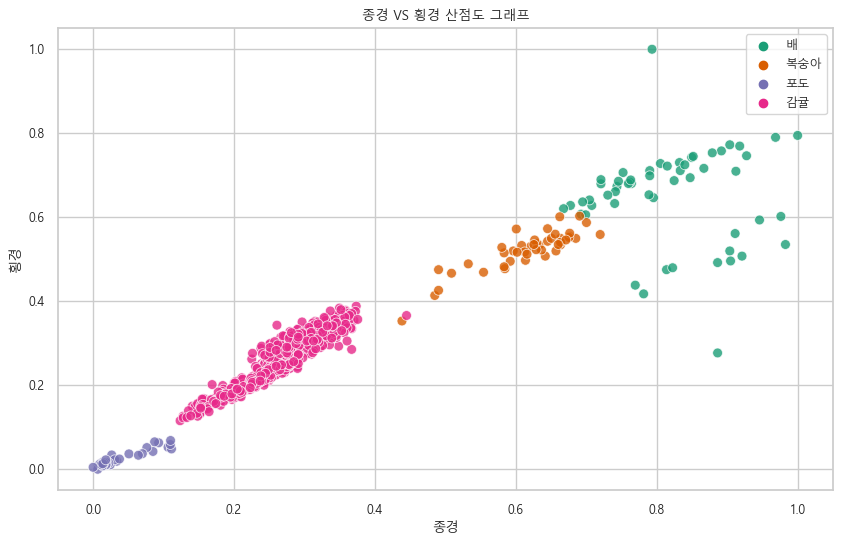

In [763]:
# 산점도 초기화
plt.figure(figsize=(10, 6))

# 각 과일에 대한 산점도 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=.8)
sns.scatterplot(x='종경', y='횡경', hue='과일', data=fruit_data_df, palette='Dark2', s=50, alpha=0.8)

# 축 라벨링과 제목
plt.xlabel('종경')
plt.ylabel('횡경')
plt.title('종경 VS 횡경 산점도 그래프')

# 범례 표시
plt.legend()

# 그림 표시
plt.show()

### [ 당도VS산도 산점도 표현 ]

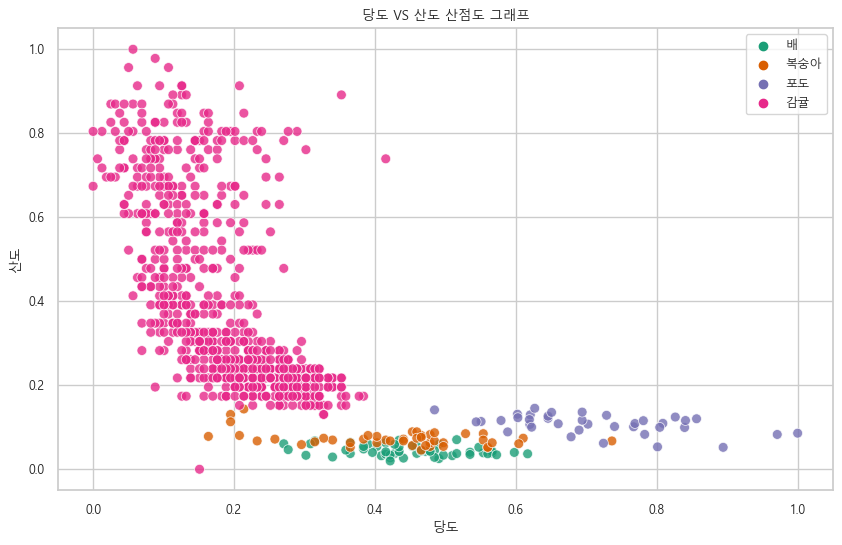

In [764]:
# 산점도 초기화
plt.figure(figsize=(10, 6))

# 각 과일에 대한 산점도 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=.8)
sns.scatterplot(x='당도', y='산도', hue='과일', data=fruit_data_df, palette='Dark2', s=50, alpha=0.8)

# 축 라벨링과 제목
plt.xlabel('당도')
plt.ylabel('산도')
plt.title('당도 VS 산도 산점도 그래프')

# 범례 표시
plt.legend()

# 그림 표시
plt.show()

### [ 각 열의 분포 확인 ]

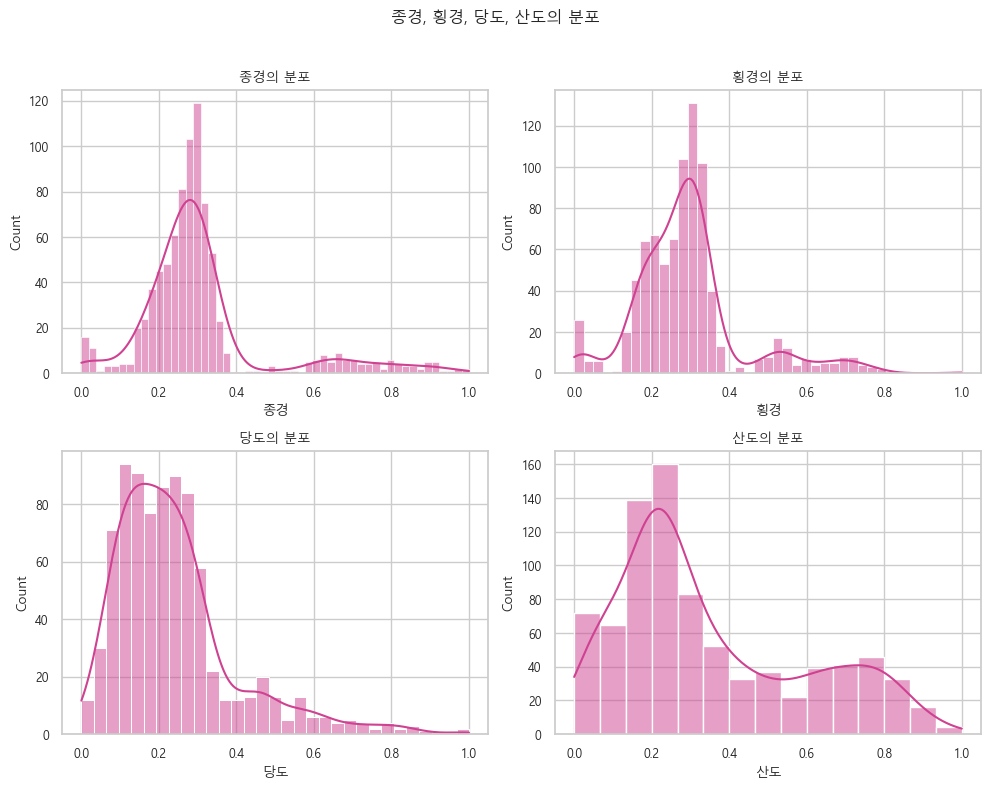

In [765]:
# 서브플롯 초기화
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=.8, palette='PiYG')

# '종경'의 분포
sns.histplot(fruit_data_df['종경'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('종경의 분포')

# '횡경'의 분포
sns.histplot(fruit_data_df['횡경'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('횡경의 분포')

# '당도'의 분포
sns.histplot(fruit_data_df['당도'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('당도의 분포')

# '산도'의 분포
sns.histplot(fruit_data_df['산도'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('산도의 분포')

# 전체 그림의 제목
fig.suptitle('종경, 횡경, 당도, 산도의 분포')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 그림 표시
plt.show()

### [ 각 열의 쌍에 대한 산점도 ]

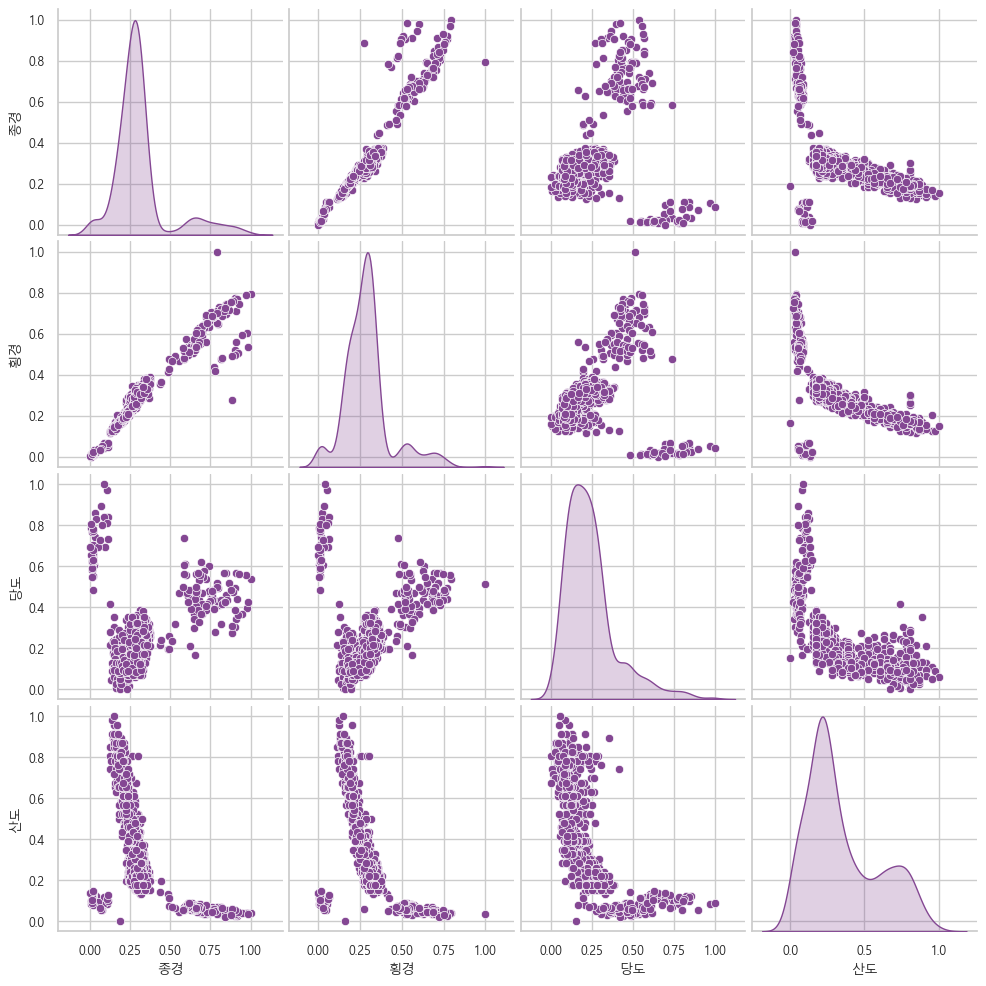

In [766]:
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=.8, palette='PRGn')
sns.pairplot(fruit_data_df, height=2.5, diag_kind='kde')
plt.show()

### [ 각 열의 상관계수 히트맵 ]

In [767]:
# 상관 계수
fruit_data_df.corr()

,종경,횡경,당도,산도
종경,1.000000,0.947545,0.300665,-0.535357
횡경,0.947545,1.000000,0.271341,-0.584822
당도,0.300665,0.271341,1.000000,-0.649673
산도,-0.535357,-0.584822,-0.649673,1.000000


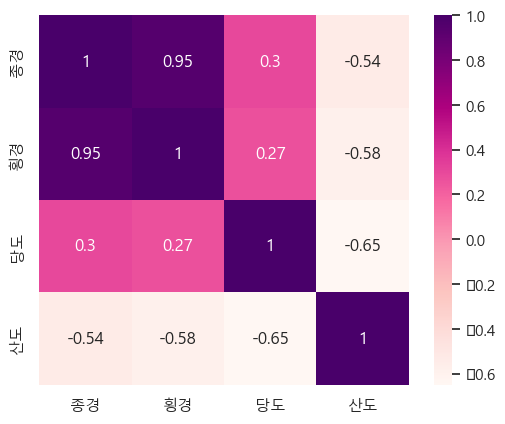

In [769]:
#상관 계수 히트맵
sns.set(font ='Malgun Gothic', font_scale=1)
sns.heatmap(data=fruit_data_df.corr(), annot=True, cmap='RdPu',square=True, cbar=True)
plt.show()

### [ 학습-테스트 데이터셋 분할 ]

In [770]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 데이터와 정답 분류
X = fruit_data_df[['종경', '횡경', '당도', '산도']]
y = label_encoder.fit_transform(fruit_data_df['과일']) # '과일' 열을 숫자로 변환

# 데이터를 학습 및 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### [ knn 분류 알고리즘 ]

In [771]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류 모델 초기화
model = RandomForestClassifier()

# k-겹 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=5)  # 5겹 교차 검증 예시

# 교차 검증 정확도 출력
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))

# 모델 학습
model.fit(X_train, y_train)

# 테스트셋에 대한 예측
y_pred = model.predict(X_test)
print('예측값 : ', y_pred)
print('정답 : ', y_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 정확도: {accuracy:.2f}')

# 분류 보고서
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.98224852 0.99408284 0.99404762 1.         0.98809524]
Mean Accuracy: 0.99
예측값 :  [0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 3 0 0 3 0
 1 0 0 3 2 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 1 0 0 0 3 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 1 0 0 0 0 0]
정답 :  [0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 3 0 0 3 0
 1 0 0 3 2 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 1 0 0 0 3 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 1 0 0 0 0 0]
테스트 정확도: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      0.92      0.96        12
           2       0

### [  로지스틱 회귀 알고리즘 ]

In [772]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 초기화
model = LogisticRegression()

# 모델 학습
model.fit(X, y)

# 테스트셋에 대한 예측
y_pred = model.predict(X_test)
print('예측값 : ', y_pred)
print('정답 : ', y_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 정확도: {accuracy:.2f}')

# 분류 보고서
print(classification_report(y_test, y_pred))

예측값 :  [0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 3 0 0 3 0
 1 0 0 3 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 1 0 0 0 0 0]
정답 :  [0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 3 0 0 3 0
 1 0 0 3 2 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 1 0 0 0 3 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 1 0 0 0 0 0]
테스트 정확도: 0.93
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       138
           1       0.63      1.00      0.77        12
           2       1.00      0.15      0.27        13
           3       1.00      1.00      1.00         6

    accuracy 

## 6-2.판매량으로 특징의 과일 선호도가 높은지 분석

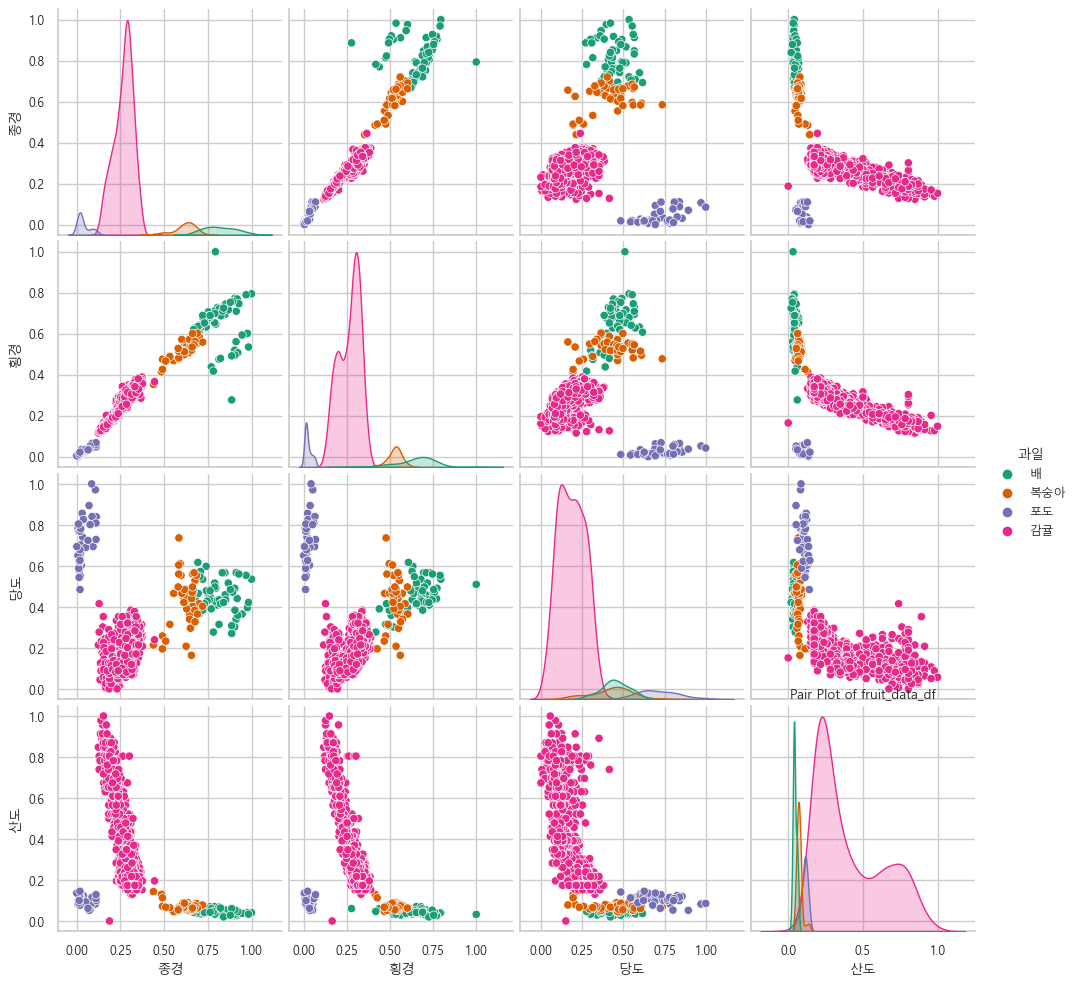

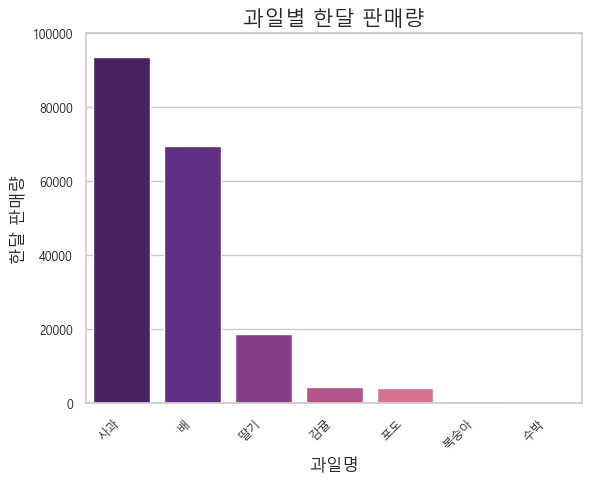

In [773]:
# 과일 특징 시각화
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=.8, palette='Dark2')
sns.pairplot(fruit_data_df, hue='과일', height=2.5, diag_kind='kde')
plt.title('Pair Plot of fruit_data_df')
plt.show()

# 판매량 차트 그리기
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#63218f', '#4b186c' ]
ax = sns.barplot(data=new_df, x=new_df.index, y='한달판매량', palette=reversed(colors))
ax.set_title('과일별 한달 판매량', fontsize=15)
ax.set_xlabel('과일명', fontsize=12)
ax.set_ylabel('한달 판매량', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # x축 눈금 지정
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])  # y축 눈금 지정
plt.show()

# 7. 블로그 데이터 클라우드로 보는 과일 트렌드 분석

## 7-1.  네이버 블로그 API로 자료 수집

In [ ]:
# rMIg8ujisG5V2gqM8LpI
# XlkFhrMewH

In [774]:
import os
import sys
import urllib.request
from datetime import datetime
import time
import json

client_id = 'rMIg8ujisG5V2gqM8LpI'
client_secret = 'XlkFhrMewH'

#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    link = post['link']

#     pDate = datetime.datetime.strptime(post['postdate'],  '%a, %d %b %Y %H:%M:%S +0900')
#     pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    
    pDate = datetime.strptime(post['postdate'], '%Y%m%d')
    pDate = pDate.strftime('%d %b %Y')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 'link': link,   'pDate':pDate})
    return

#[CODE 0]
def main():
    node = 'blog'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []
    
    # 현재 날짜를 '년월일' 형식의 문자열로 가져오기
    current_date = datetime.now().strftime('%Y%m%d')

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]

    print('전체 검색 : %d 건' %total)

    with open(current_date+'%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    
    print("가져온 데이터 : %d 건" %(cnt))
    print (current_date+'%s_naver_%s.json SAVED' % (srcText, node))

if __name__ == '__main__':
    main()

검색어를 입력하세요: 과일
[2023-11-27 18:42:48.587788] Url Request Success
[2023-11-27 18:42:48.829700] Url Request Success
[2023-11-27 18:42:49.092798] Url Request Success
[2023-11-27 18:42:49.378439] Url Request Success
[2023-11-27 18:42:49.651815] Url Request Success
[2023-11-27 18:42:49.973823] Url Request Success
[2023-11-27 18:42:50.265934] Url Request Success
[2023-11-27 18:42:50.536108] Url Request Success
[2023-11-27 18:42:50.866303] Url Request Success
[2023-11-27 18:42:51.163836] Url Request Success
HTTP Error 400: Bad Request
[2023-11-27 18:42:51.228748] Error for URL : https://openapi.naver.com/v1/search/blog.json?query=%EA%B3%BC%EC%9D%BC&start=1001&display=100
전체 검색 : 14522660 건
가져온 데이터 : 1000 건
20231127과일_naver_blog.json SAVED


## 7-2.  데이터 클라우드 생성

In [794]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [795]:
inputFileName = './20231127과일_naver_blog'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
print(data[:3])  # 처음 3개 항목만 출력

[{'cnt': 1, 'description': '인스타에서 봤던 성수 한정선인데 <b>과일</b> 찹쌀떡을 종류별로 판매하고 있는 거였다. 핫한 디저트는 못... 사실 요즘 여기저기서 <b>과일</b>모찌 이래가지고 좀 보기 싫었는데 떡이라고 한글로 써 놓으니까 흡족했다. 두... ', 'link': 'https://blog.naver.com/nowwegom/223268456335', 'pDate': '18 Nov 2023', 'title': '성수 한정선 쫀득쫀득한 <b>과일</b> 찹쌀떡 포장'}, {'cnt': 2, 'description': '포스팅은 <b>과일</b>멘솔 액상 4종 추천 리뷰를 해드리려고 해요 :-) 저는 5년 동안 전담을 사용 하는 베이퍼인데요 확실히 연초를 끊길 잘한 것 같아요 다양한 액상의 종류를 접했지만 제 취향엔 <b>과일</b> 멘솔 액상이 잘... ', 'link': 'https://blog.naver.com/cooldj79/223272689786', 'pDate': '23 Nov 2023', 'title': '<b>과일</b> 멘솔 액상 4종 추천 리뷰'}, {'cnt': 3, 'description': '건강을 위해 <b>과일</b>과 채소를 섭취하는 분들이 많습니다. 그런데, 혈당 때문에 문제가 생기는 당뇨의 경우에는 어떨까요? <b>과일</b>은 대표적으로 당이 많은 식품인데 당뇨에 좋은 <b>과일</b>이라는 게 다소 어불성설일 수... ', 'link': 'https://blog.naver.com/pamaba/223271581989', 'pDate': '22 Nov 2023', 'title': '당뇨에 좋은 <b>과일</b> 먹는 방법 간식까지 알아보기'}]


In [796]:
message = ''

for item in data:
    if 'description' in item.keys():
        message = message + re.sub(r'[^a-zA-Z\s\w]', ' ', item['description']) +''

print(message[:150],'...') # 데이터 일부 확인

인스타에서 봤던 성수 한정선인데  b 과일  b  찹쌀떡을 종류별로 판매하고 있는 거였다  핫한 디저트는 못    사실 요즘 여기저기서  b 과일  b 모찌 이래가지고 좀 보기 싫었는데 떡이라고 한글로 써 놓으니까 흡족했다  두    포스팅은  b 과일  b 멘솔 액상 ...


In [797]:
tokens_ko = komo.nouns(message)

In [798]:
import nltk
ko = nltk.Text(tokens=tokens_ko)
print(len(ko))

20848


In [799]:
count_df_data = pd.DataFrame(tokens_ko)
count_df = pd.DataFrame(count_df_data.value_counts())
count_df.columns=['빈도수']
count_df.head()

,빈도수
0,
과일,2547
을,246
선물,214
수,206
제철,160


In [800]:
from PIL import Image

class Visualization:
    def __init__(self, wordList):
        self.wordList = wordList
        self.wordDict = dict(wordList)  # list를 딕셔너리로 변경
        print(self.wordDict)

    def makeWordCloud(self): # 워드 클라우드
        a_color_file = 'fruit.jpg'
        a_coloring = np.array(Image.open(a_color_file))
        font_path = "C:/Windows/Fonts/malgun.ttf"
        wordcloud = WordCloud(font_path=font_path,  mask=a_coloring, \
                              relative_scaling=0.3, background_color='lightyellow')
        wordcloud = wordcloud.generate_from_frequencies(self.wordDict)

        plt.imshow(wordcloud)
        plt.axis('off')

        filename = 'myWordCloud.png'
        plt.figure(figsize=(9, 9))
        plt.savefig(filename, dpi=700, bbox_inches='tight')
        print(filename + ' 파일이 저장되었습니다.')
        
    def makeBarChart(self): # 막대 그래프 그리기
        barcount = 15  # 막대 개수 : 10개만 그리겠다.
        xlow, xhigh = - 0.5, barcount - 0.5

        result = self.wordList[:barcount]
        chartdata = []  # 차트 수치
        xdata = []  # 글씨
        mycolor = ['r', 'g', 'b', 'y', 'm', 'c', '#FFF0F0', '#CCFFBB', '#05CCFF', '#11CCFF']

        for idx in range(len(result)):
            chartdata.append(result[idx][1])
            xdata.append(result[idx][0])

            value = str(chartdata[idx]) + '건'  # 예시 : 60건
            plt.text(x=idx, y=chartdata[idx] - 5, s=value, fontsize=8, horizontalalignment='center')

        plt.xticks(range(barcount), xdata, rotation=45)
        plt.bar(range(barcount), chartdata, align='center', color=mycolor)

        plt.title('상위 ' + str(barcount) + '빈도수')
        plt.xlim([xlow, xhigh])
        plt.xlabel('주요 키워드')
        plt.ylabel('빈도수')
        filename = 'myBarChart.png'
        plt.savefig(filename, dpi=400, bbox_inches='tight')
        print(filename + ' 파일이 저장되었습니다.')

In [802]:
data = ko.vocab().most_common(500)

wordlist = list()  # 튜플(단어, 빈도수)을 저장할 리스트
for word, count in data :
    # ccount는 빈도수를 의미하고, len(word)는 단어의 길이를 의미합니다.
    if (count >= 1 and len(word) >= 2) :
        wordlist.append((word, count))
visual = Visualization(wordlist)

{'과일': 2547, '선물': 214, '제철': 160, '사과': 151, '아기': 123, '오늘': 114, '요즘': 96, '간식': 95, '추석': 88, '건강': 86, '채소': 79, '주문': 79, '샐러드': 79, '안녕하세요': 76, '카페': 73, '음식': 70, '추천': 68, '단감': 65, '주스': 65, '종류': 64, '세트': 61, '야채': 60, '딸기': 59, '바구니': 58, '강아지': 58, '개월': 58, '액상': 57, '소개': 52, '포장': 51, '세척': 50, '박스': 50, '이번': 50, '준비': 49, '제주': 49, '케이크': 48, '구매': 48, '생각': 47, '가게': 47, '아침': 47, '복숭아': 47, '디저트': 46, '망고': 46, '사용': 45, '가격': 45, '빙수': 45, '겨울': 44, '명절': 43, '대표': 41, '시기': 41, '시작': 41, '가지': 41, '포도': 41, '요리': 40, '여행': 40, '키위': 39, '맛집': 39, '젤리': 36, '가을': 36, '열대': 36, '아이': 35, '사라': 35, '크림': 35, '제품': 34, '시장': 34, '사진': 34, '이유식': 33, '바나나': 33, '감귤': 33, '계절': 33, '마트': 33, '때문': 32, '제가': 32, '후기': 32, '판매': 31, '샤인': 31, '비타민': 30, '아이들': 30, '여름': 30, '섭취': 29, '황금향': 29, '가족': 29, '찹쌀떡': 28, '모찌': 28, '마음': 28, '보관': 28, '머스캣': 27, '방법': 26, '재료': 25, '방문': 25, '10월': 25, '껍질': 25, '세제': 25, '사실': 24, '평소': 24, '가정': 24, '메뉴': 24, '위치': 24, '주방':

myWordCloud.png 파일이 저장되었습니다.


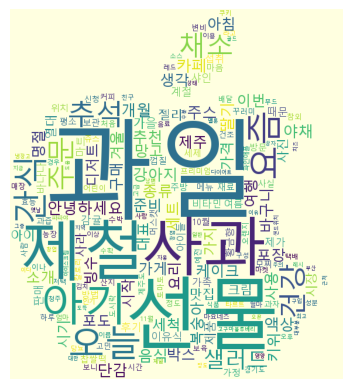

<Figure size 900x900 with 0 Axes>

In [804]:
visual.makeWordCloud()

myBarChart.png 파일이 저장되었습니다.


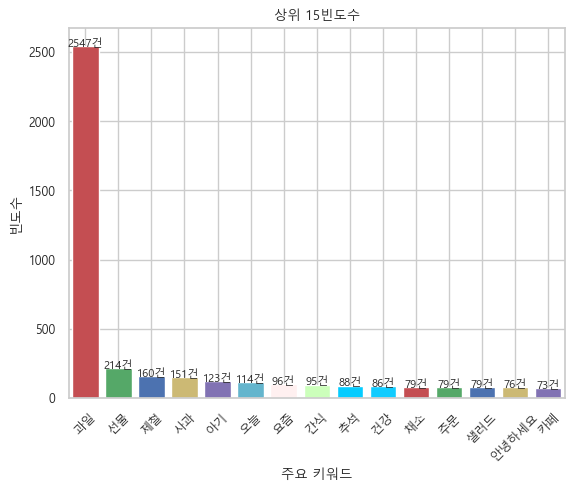

In [805]:
visual.makeBarChart()

In [806]:
# 불용어 제거
from konlpy.tag import Komoran
komo = Komoran()
tokens_ko2 = komo.nouns(message)
stop_word_file = 'stopword.txt'
stop_file = open(stop_word_file, 'rt', encoding='utf-8')
stop_words = [ word.strip() for word in stop_file.readlines()]

print("불용어", stop_words)
tokens_ko2 = [each_word for each_word in tokens_ko2 if each_word not in stop_words]

불용어 ['안녕하세요', '종류', '소개', '강아지', '사용', '사라', '제가', '때문', '후기', '정도', '방문', '처음', '위치', '이나', '사실', '보니', '평소', '시간', '라고', '그중', '리뷰', '이다', '레시', '대부분', '이랑', '하이', '자리', '이상', '경우', '최근', '근처', '입구', '하면', '그런지', '분이', '동안', '원래', '각종', '이제', '사다', '해서', '지난번', '며칠', '오늘', '요즘', '이번', '조금', '다음', '오랜만', '진행', '나트', '주변', '사서', '중간', '이예', '등등', '오새', '올해']


In [553]:
ko2 = nltk.Text(tokens=tokens_ko2)
print(len(ko2))

19522


In [807]:
data = ko2.vocab().most_common(500)

wordlist2 = list()  # 튜플(단어, 빈도수)을 저장할 리스트
for word, count in data :
    # count는 빈도수를 의미하고, len(word)는 단어의 길이를 의미합니다.
    if (count >= 1 and len(word) >= 2) :
        wordlist2.append((word, count))
visual2 = Visualization(wordlist2)

{'과일': 2516, '선물': 265, '제철': 178, '사과': 158, '추석': 115, '아기': 112, '세트': 91, '간식': 86, '샐러드': 76, '음식': 75, '카페': 72, '주문': 71, '건강': 69, '추천': 66, '야채': 66, '액상': 66, '개월': 65, '주스': 64, '준비': 63, '채소': 62, '명절': 59, '가게': 57, '바구니': 57, '세척': 56, '빙수': 52, '복숭아': 52, '케이크': 52, '키위': 52, '단감': 51, '포도': 49, '디저트': 47, '딸기': 46, '제주': 46, '가격': 45, '시작': 45, '망고': 44, '포장': 44, '생각': 43, '아침': 43, '구매': 42, '가을': 42, '가지': 40, '여행': 39, '맛집': 37, '박스': 36, '요리': 36, '열대': 36, '바나나': 35, '여름': 35, '이유식': 34, '아이': 34, '사진': 34, '마트': 34, '시기': 31, '보관': 31, '계절': 31, '대표': 31, '세제': 31, '샤인': 31, '머스캣': 31, '10월': 31, '가족': 30, '아이들': 30, '크림': 30, '판매': 29, '시장': 29, '비타민': 29, '감귤': 29, '주방': 29, '젤리': 29, '마음': 29, '고민': 29, '오렌지': 28, '쥬스': 26, '제품': 26, '방법': 26, '프리미엄': 26, '황금향': 26, '모찌': 25, '겨울': 25, '재료': 25, '수박': 24, '농장': 24, '참외': 24, '변비': 24, '섭취': 23, '껍질': 23, '하루': 23, '찹쌀떡': 22, '메뉴': 22, '도시락': 22, '효능': 21, '제주도': 21, '커피': 21, '사람': 21, '도마': 21, '배달': 20, '이용'

myWordCloud.png 파일이 저장되었습니다.


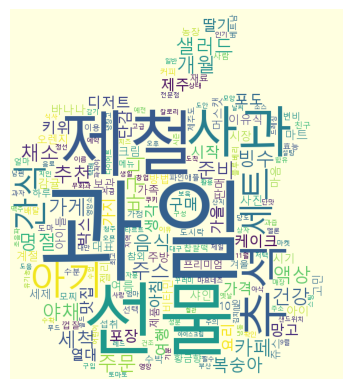

<Figure size 900x900 with 0 Axes>

In [808]:
visual2.makeWordCloud()

## 7-3.  최근 일주일간의 관심도 변화

### [네이버 블로그 검색 API 사용]

In [789]:
import urllib.parse
import urllib.request
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time

# 네이버 블로그 검색 결과 수집 함수
def get_result(client_id, client_secret, query, display=100, start=1, sort='sim', max_page=5):
    result_list = []

    for page in range(1, max_page + 1):
        enc_text = urllib.parse.quote(query)
        url = f"https://openapi.naver.com/v1/search/blog?query={enc_text}&display={display}&start={(page-1)*display + 1}&sort={sort}"

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id", client_id)
        request.add_header("X-Naver-Client-Secret", client_secret)

        try:
            response = urllib.request.urlopen(request)
            res_code = response.getcode()

            if res_code == 200:
                response_body = response.read()
                response_json = json.loads(response_body)
                items = response_json.get('items', [])

                if not items:
                    break  # No more items

                result_list.extend(items)
            else:
                print(f"Error Code: {res_code}")
                break
        except Exception as e:
            print(f"An error occurred: {e}")
            break

        time.sleep(0.1)  # sleep 시켜서 요청 부하 방지

    return pd.DataFrame(result_list)

### [텍스트 데이터에서 과일 언급 추출 후 일주일간의 빈도수 계산]

In [790]:
# 텍스트 데이터 분석 함수
def analyze_fruit_mentions(client_id, client_secret, queries, fruits, display=100, max_page=5):

    # 날짜에 대한 각 과일의 빈도를 저장할 데이터 프레임
    date_fruit_df = pd.DataFrame(columns=['date'] + fruits)

    # 일주일로 기간 설정
    end_date = datetime.now() - timedelta(days=1) # 하루 전
    start_date = end_date - timedelta(days=7)
    
    for query in queries:
        result_df = get_result(client_id, client_secret, query, display=display, max_page=max_page)
        
        for index, row in result_df.iterrows():
            # 'postdate' 필드에서 날짜 추출
            date_str = row.get('postdate', '')
            date = datetime.strptime(date_str, '%Y%m%d')

            # 일주일간의 데이터 수집
            if start_date <= date <= end_date:
                # 데이터 프레임이 존재하지 않을경우 초기화
                if date not in date_fruit_df['date'].tolist():
                    new_row = pd.DataFrame([[date.strftime('%Y-%m-%d')] + [0] * len(fruits)], columns=['date'] + fruits)
                    date_fruit_df = pd.concat([date_fruit_df, new_row], ignore_index=True)

                # description' 필드의 각 과일에 대한 언급을 계산
                description = row.get('description', '').lower()

                for fruit in fruits:
                    count = description.count(fruit.lower())
                    date_fruit_df.loc[date_fruit_df['date'] == date.strftime('%Y-%m-%d'), fruit] += count

    # 날짜별 각 과일의 빈도를 합산
    grouped_data = date_fruit_df.groupby('date')[fruits].sum()
    return grouped_data
    
query = ['과일', '귤', '딸기', '복숭아', '사과', '수박', '포도', '제철'] 
fruits = ['귤', '딸기', '배', '복숭아', '사과', '수박', '포도']
grouped_data = analyze_fruit_mentions(client_id, client_secret, query, fruits, max_page=5)
grouped_data

,귤,딸기,배,복숭아,사과,수박,포도
date,,,,,,,
2023-11-20,890,495,394,357,785,503,703
2023-11-21,1406,2994,1256,620,2750,713,1094
2023-11-22,1517,1974,936,441,1986,1363,375
2023-11-23,2634,4043,1302,1392,3244,697,574
2023-11-24,1087,2896,495,480,2052,852,2372
2023-11-25,1418,4792,359,803,4949,554,1458
2023-11-26,1797,2602,729,806,1637,518,2150


### [ 과일 언급량 추이 시각화 ] 

[Text(0.5, 0, '날짜'), Text(0, 0.5, '언급량'), Text(0.5, 1.0, '과일 언급량 변화 (최근 1주일)')]

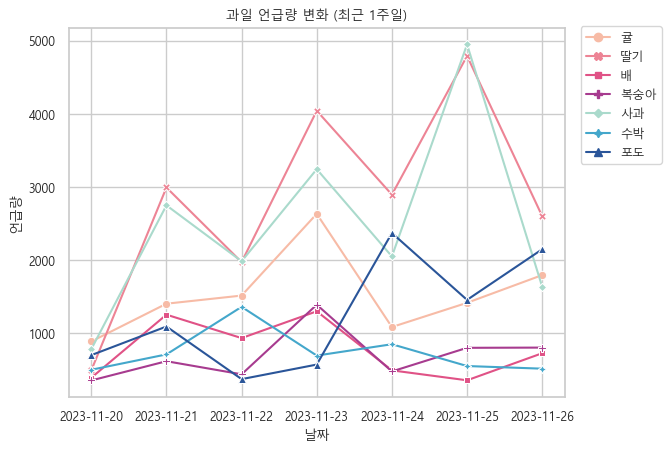

In [792]:
# 선 그래프
colors = ['#f7bba6', '#ed8495', '#e05286', '#a73b8f', '#aadacc', '#44a7cb', '#2a5599']  # 색상 리스트
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=.8, palette=colors)
ax = sns.lineplot(data=grouped_data, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='날짜', ylabel='언급량',title='과일 언급량 변화 (최근 1주일)')

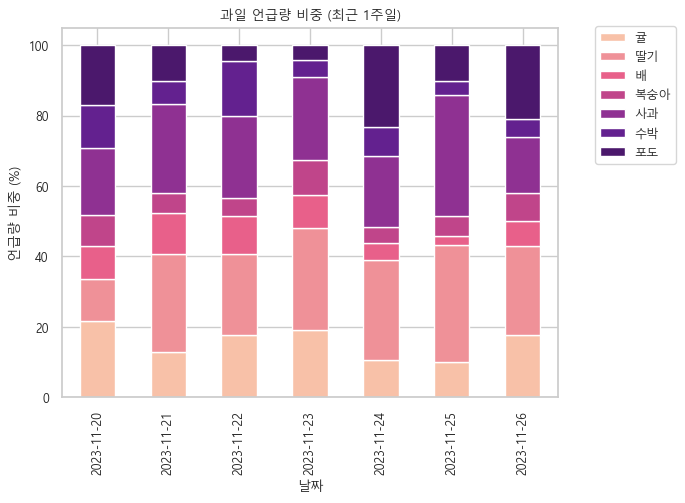

In [793]:
# 누적 막대 차트
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100 #백분율로 전환
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#63218f', '#4b186c', '#33104a' ]
grouped_data_percentage.plot(kind='bar', stacked=True, color=colors)
plt.title('과일 언급량 비중 (최근 1주일)')
plt.xlabel('날짜')
plt.ylabel('언급량 비중 (%)')

# 범례 위치와 레이아웃 조정
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()